In [42]:
import os
import pandas as pd

# Define the folder path where all the Excel files are stored
folder_path = r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\alarm report from outlook"

# Initialize an empty list to store DataFrames
all_dataframes = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".XLS"):  # Only process .XLS files
        file_path = os.path.join(folder_path, file_name)
        try:
            # Attempt to read the file with xlrd engine
            df = pd.read_excel(file_path, engine='xlrd')
            if not df.empty:  # Ensure the DataFrame is not empty
                all_dataframes.append(df)
                print(f"Successfully loaded: {file_name} - {df.shape[0]} rows")
            else:
                print(f"File is empty: {file_name}")
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

# Combine all the DataFrames into a single DataFrame
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\nCombined DataFrame created with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
    

else:
    print("\nNo valid DataFrames were found to combine.")

Successfully loaded: s49-638460873411201718.XLS - 20359 rows
Successfully loaded: s49-638461737405002388.XLS - 23937 rows
Successfully loaded: s49-638462601399202060.XLS - 25809 rows
Successfully loaded: s49-638463465393240742.XLS - 26860 rows
Successfully loaded: s49-638464329427647228.XLS - 20522 rows
Successfully loaded: s49-638465193417659408.XLS - 25500 rows
Successfully loaded: s49-638466057385413024.XLS - 27301 rows
Successfully loaded: s49-638466921344391949.XLS - 20251 rows
Successfully loaded: s49-638467785405766226.XLS - 20174 rows
Successfully loaded: s49-638468649379425678.XLS - 25685 rows
Successfully loaded: s49-638471241428368507.XLS - 21981 rows
Successfully loaded: s49-638472105408768536.XLS - 22774 rows
Successfully loaded: s49-638472969410716771.XLS - 24460 rows
Successfully loaded: s49-638473833424073473.XLS - 24995 rows
Successfully loaded: s49-638474697364101268.XLS - 29213 rows
Successfully loaded: s49-638475561397646922.XLS - 28294 rows
Successfully loaded: s49

In [43]:
filtered_df = combined_df[combined_df['Handling Time'].notna()]
print(filtered_df.shape)
filtered_df.head()

(1218746, 10)


Site Name Post Code       Link Account  Event Date Event Time  \
1   Citizens Theatre    G5 9DS  Keir Construction  14/03/2024   18:50:09   
3   Citizens Theatre    G5 9DS  Keir Construction  14/03/2024   19:28:54   
6   Citizens Theatre    G5 9DS  Keir Construction  14/03/2024   20:48:35   
8   Citizens Theatre    G5 9DS  Keir Construction  14/03/2024   22:09:57   
10  Citizens Theatre    G5 9DS  Keir Construction  15/03/2024   01:56:04   

                                         Event Detail  \
1   Line Crossed T:TA504(2) A:1 C:14 Cam 14 2024/3...   
3   Line Crossed T:TA489(1) A:1 C:14 Cam 14 2024/3...   
6   Line Crossed T:TA213(3) A:1 C:7 Cam7 2024/3/14...   
8   Line Crossed T:TA504(2) A:1 C:12 Cam 12 2024/3...   
10  Line Crossed T:TA489(1) A:1 C:14 Cam 14 2024/3...   

                           Resolution Handling Time     Installer Operator  
1     Security Branded Person on Site      00:31:09  Prime Secure       DA  
3   Activation outside Protected Area      00:10:36  Prime Secure       DA  
6   Activation outside Protected Area      00:00:30  Prime Secure       SE  
8                    No Visible Cause      00:00:10  Prime Secure       DA  
10    Security Branded Person on Site      00:04:52  Prime Secure       SE

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\285980950.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\285980950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\285980950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

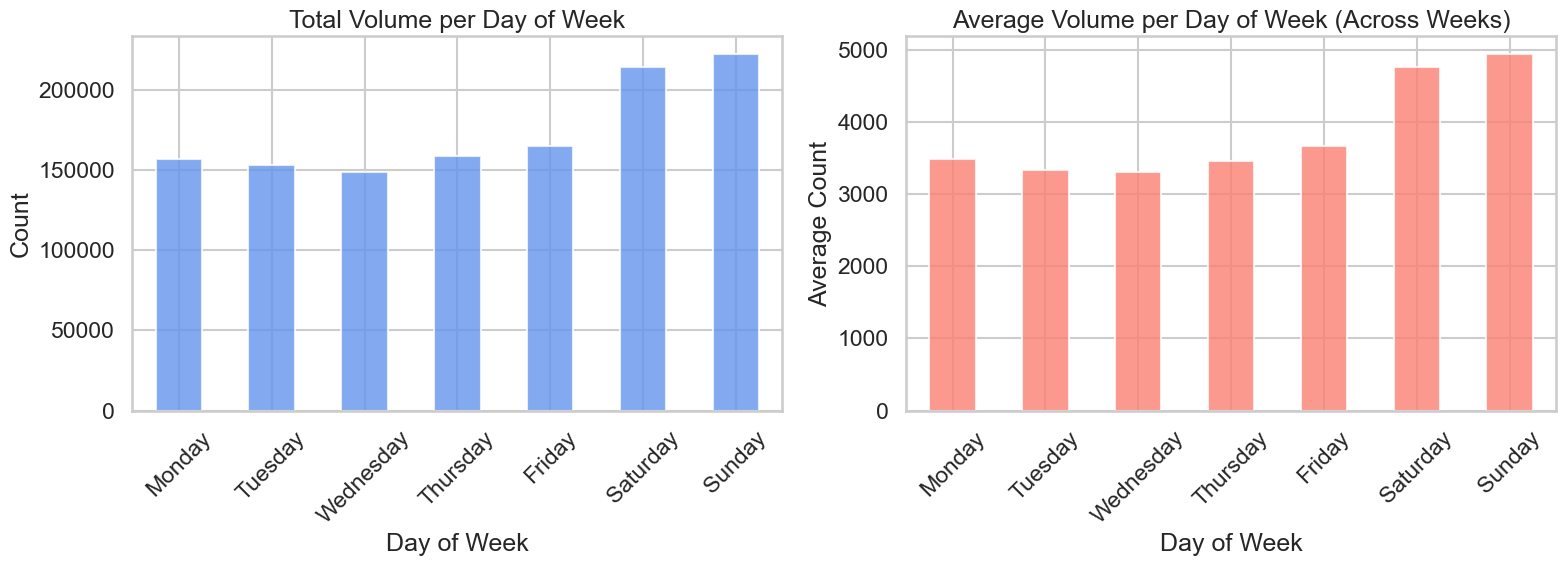

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['DayOfWeek'] = filtered_df['Event Date'].dt.day_name()
volume_per_day = filtered_df.groupby('DayOfWeek').size()

# Ensure the day order is Monday-Sunday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
volume_per_day = volume_per_day.reindex(ordered_days, fill_value=0)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # side-by-side subplots
volume_per_day.plot(kind='bar', color='cornflowerblue', alpha=0.8)
plt.title("Total Volume per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Calculate average per day-of-week across weeks:
daily_volume = filtered_df.groupby(['Event Date', 'DayOfWeek']).size().reset_index(name='Count')
daily_volume['Event Date'] = pd.to_datetime(daily_volume['Event Date'])
daily_volume['week'] = daily_volume['Event Date'].dt.isocalendar().week
daily_volume['year'] = daily_volume['Event Date'].dt.isocalendar().year

# Sum daily counts by (day-of-week, year, week)
grouped = daily_volume.groupby(['DayOfWeek', 'year', 'week'])['Count'].sum().reset_index()

# Mean across all year/week combos for each day-of-week
average_per_day = grouped.groupby('DayOfWeek')['Count'].mean().reindex(ordered_days, fill_value=0)

# Plot average volume per day-of-week
plt.subplot(1, 2, 2)
average_per_day.plot(kind='bar', color='salmon', alpha=0.8)
plt.title("Average Volume per Day of Week (Across Weeks)")
plt.xlabel("Day of Week")
plt.ylabel("Average Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

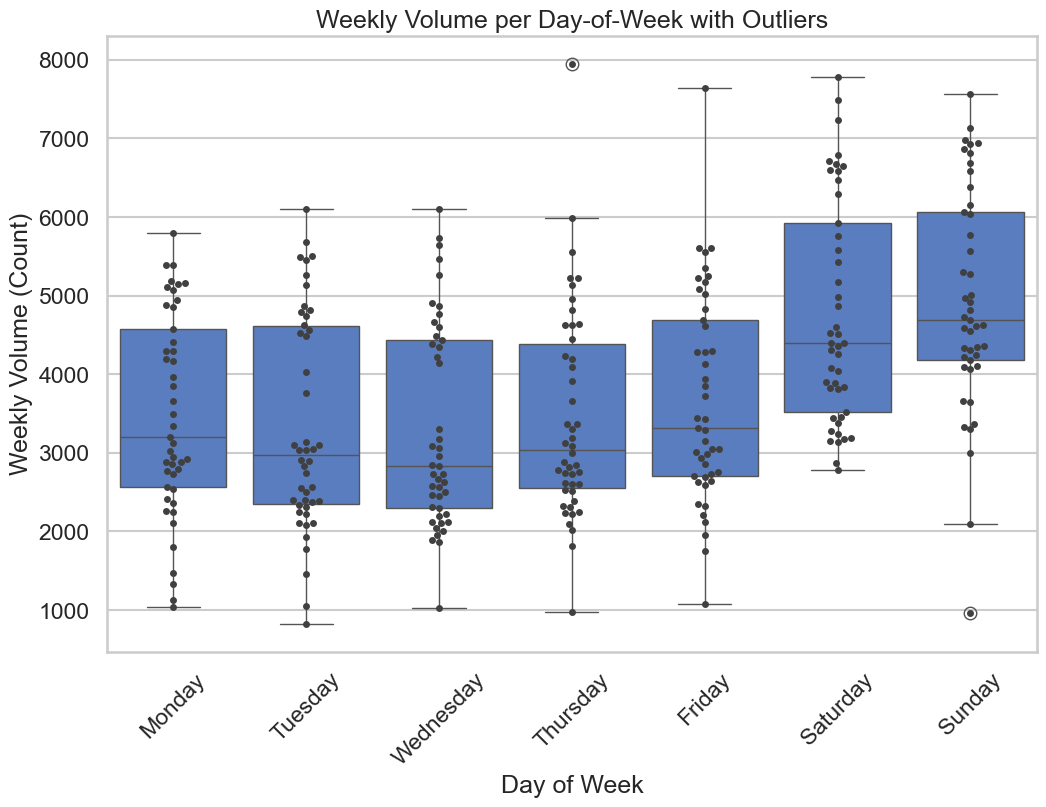

Detected outliers per day-of-week:
Monday: None
Tuesday: None
Wednesday: None
Thursday: [7950]
Friday: None
Saturday: None
Sunday: [960]


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the previously computed 'grouped' DataFrame (which has the columns: DayOfWeek, year, week, Count)
# First, create a boxplot (with a swarmplot overlay) to visually inspect outliers per day-of-week
plt.figure(figsize=(12, 8))
sns.boxplot(x='DayOfWeek', y='Count', data=grouped, order=ordered_days)
sns.swarmplot(x='DayOfWeek', y='Count', data=grouped, order=ordered_days, color=".25")
plt.title("Weekly Volume per Day-of-Week with Outliers")
plt.xlabel("Day of Week")
plt.ylabel("Weekly Volume (Count)")
plt.xticks(rotation=45)
plt.show()

# Next, programmatically detect outliers using the IQR method for each day-of-week
outliers = {}
for day in ordered_days:
    day_data = grouped.loc[grouped['DayOfWeek'] == day, 'Count']
    Q1 = day_data.quantile(0.25)
    Q3 = day_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_condition = (day_data < lower_bound) | (day_data > upper_bound)
    outlier_values = day_data[outlier_condition]
    outliers[day] = outlier_values.tolist()

print("Detected outliers per day-of-week:")
for day, vals in outliers.items():
    print(f"{day}: {vals if vals else 'None'}")

The eight days (with the lowest alarm counts) with less than 1150 alarms and their counts:
Event Date
2024-08-06     826
2024-09-01     960
2024-08-01     980
2024-11-06    1024
2024-09-02    1037
2024-10-15    1046
2024-09-13    1079
2024-09-16    1130
dtype: int64


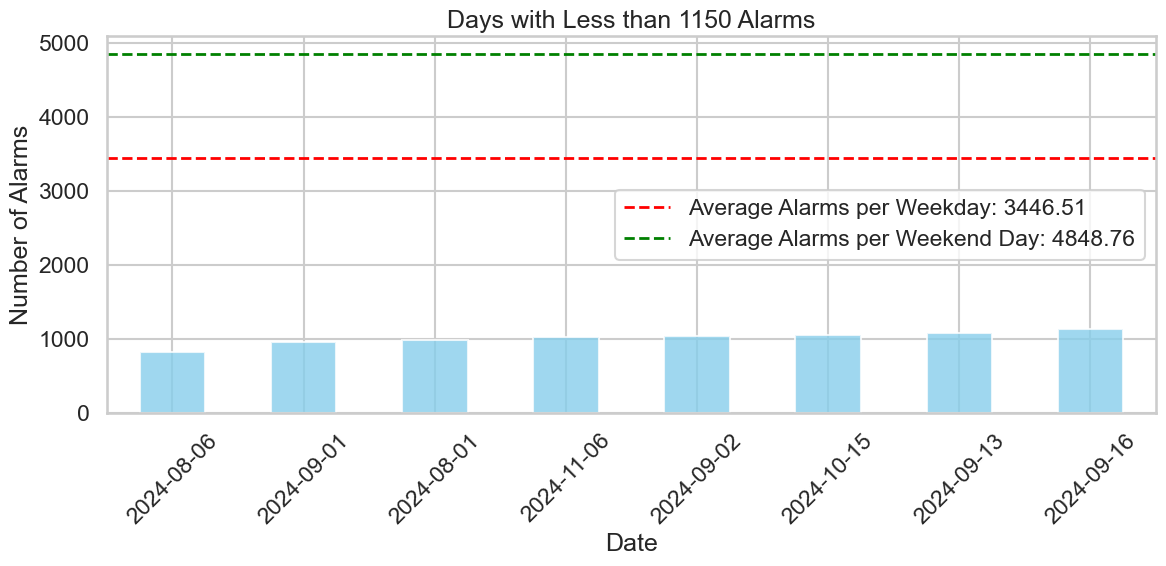

In [46]:
# Group by the date (extracting only the date part) and count alarms per day
daily_counts = filtered_df.groupby(filtered_df['Event Date'].dt.date).size()

# Filter for days with fewer than 1150 alarms
low_alarm_days = daily_counts[daily_counts < 1150]

# If exactly three days match, print them; otherwise, print the first three from sorted values
if len(low_alarm_days) == 3:
    print("The three days with less than 1150 alarms and their counts:")
    print(low_alarm_days)
else:
    low_alarm_days_sorted = low_alarm_days.sort_values()
    print("The eight days (with the lowest alarm counts) with less than 1150 alarms and their counts:")
    print(low_alarm_days_sorted.head(20))
    plt.figure(figsize=(12, 6))
    low_alarm_days_sorted.head(8).plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title("Days with Less than 1150 Alarms")
    plt.xlabel("Date")
    plt.ylabel("Number of Alarms")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Calculate the average number of alarms per weekday (Monday to Friday)
    weekdays = daily_counts[daily_counts.index.to_series().apply(lambda x: x.weekday() < 5)]
    average_alarms_per_weekday = weekdays.mean()

    # Add a reference line for the average number of alarms per weekday
    plt.axhline(y=average_alarms_per_weekday, color='red', linestyle='--', linewidth=2, label=f'Average Alarms per Weekday: {average_alarms_per_weekday:.2f}')
    
    # Calculate the average number of alarms per weekend day (Saturday and Sunday)
    weekend_days = daily_counts[daily_counts.index.to_series().apply(lambda x: x.weekday() >= 5)]
    average_alarms_per_weekend_day = weekend_days.mean()

    # Add a reference line for the average number of alarms per weekend day
    plt.axhline(y=average_alarms_per_weekend_day, color='green', linestyle='--', linewidth=2, label=f'Average Alarms per Weekend Day: {average_alarms_per_weekend_day:.2f}')
    
    plt.legend()
    plt.show()

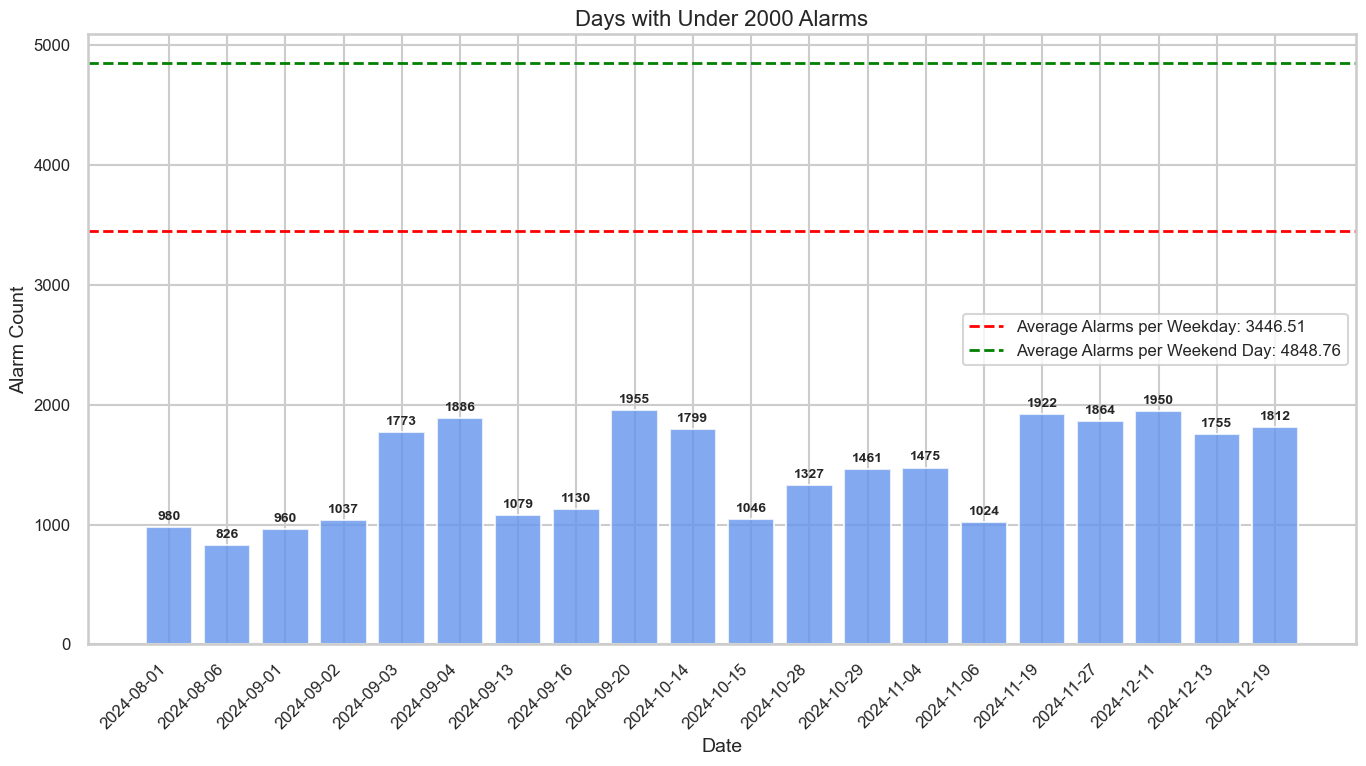

In [47]:
import matplotlib.pyplot as plt

# Group by date and count alarms per day
daily_counts = filtered_df.groupby(filtered_df['Event Date'].dt.date).size()

# Filter for days with fewer than 2000 alarms
under_2000 = daily_counts[daily_counts < 2000]

# Plot the days with their actual alarm counts
plt.figure(figsize=(14, 8))
bars = plt.bar(under_2000.index.astype(str), under_2000.values, color='cornflowerblue', alpha=0.8)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Alarm Count", fontsize=14)
plt.title("Days with Under 2000 Alarms", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add reference lines for average alarms per weekday and weekend day
plt.axhline(y=average_alarms_per_weekday, color='red', linestyle='--', linewidth=2, label=f'Average Alarms per Weekday: {average_alarms_per_weekday:.2f}')
plt.axhline(y=average_alarms_per_weekend_day, color='green', linestyle='--', linewidth=2, label=f'Average Alarms per Weekend Day: {average_alarms_per_weekend_day:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\901059056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\901059056.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\901059056.py:34: SettingWithCopyWarning: 
A valu

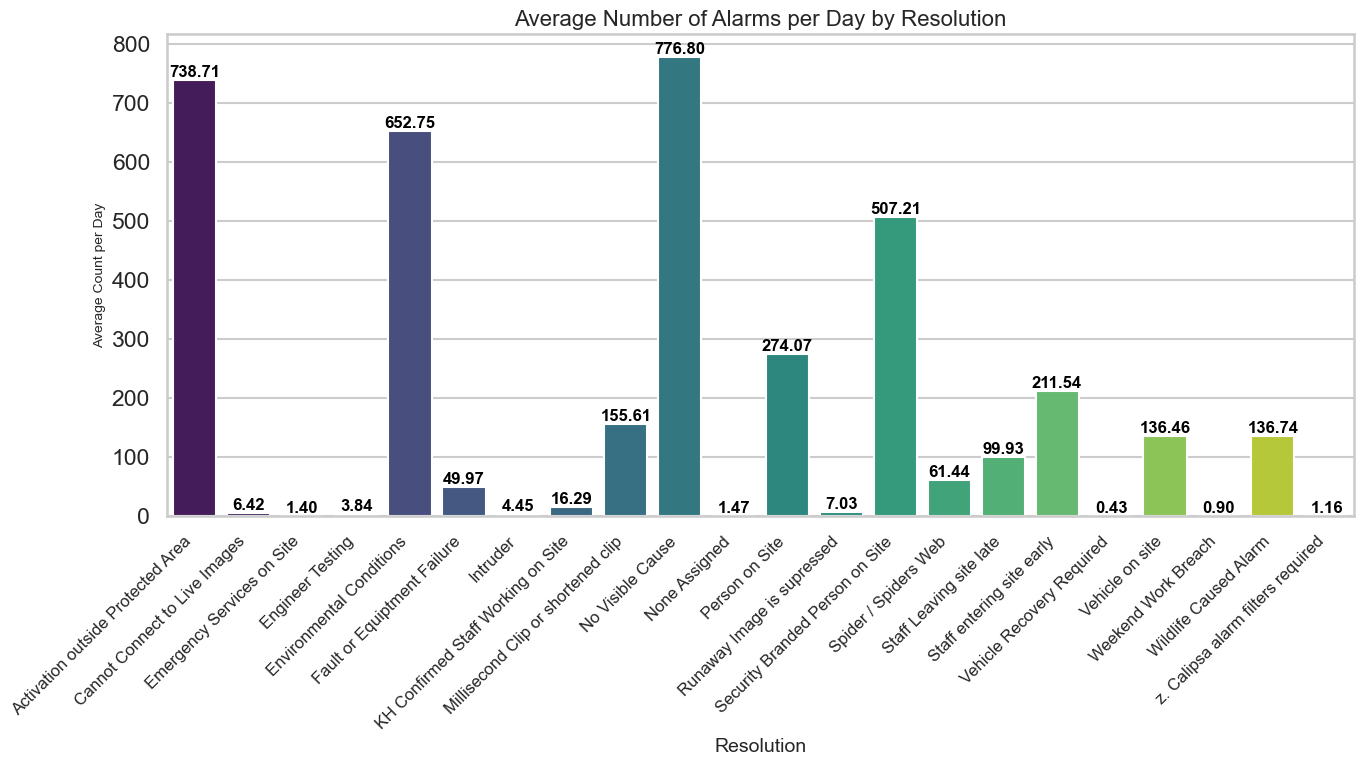

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a beautiful plotting style suitable for a high-level presentation
sns.set(style="whitegrid", context="talk", palette="muted")

# Ensure 'Event Date' is in datetime format
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')

# Convert 'Handling Time' to timedelta if it's not already
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])

# Group by each day (date only) and by the 'Resolution' column, counting alarms per group
daily_resolution_counts = (
    filtered_df.groupby([filtered_df['Event Date'].dt.date, 'Resolution'])
               .size()
               .reset_index(name='Count')
)

# Calculate the average daily count per resolution
avg_daily_by_resolution = daily_resolution_counts.groupby('Resolution')['Count'].mean().sort_values()

# Calculate average response time per resolution in minutes
avg_response_time = (
    filtered_df.groupby('Resolution')['Handling Time']
    .mean()
    .reset_index()
)
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Calculate average number of each resolution per day
filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
avg_resolution_per_day = (
    filtered_df.groupby('Resolution').size() / filtered_df['DateOnly'].nunique()
).reset_index(name='Average Count per Day')

# Merge the two DataFrames on Resolution
merged_df = pd.merge(avg_response_time, avg_resolution_per_day, on='Resolution')

# Create the plot with enhanced aesthetics and proper x-axis alignment
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=avg_resolution_per_day, 
    x='Resolution', 
    y='Average Count per Day', 
    palette='viridis'
)
plt.title('Average Number of Alarms per Day by Resolution', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Count per Day', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Annotate each bar with the actual average count value
for index, row in avg_resolution_per_day.iterrows():
    barplot.text(
        index, 
        row['Average Count per Day'] + 0.05,  # slight vertical offset above the bar
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom",
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1012786513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1012786513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1012786513.py:16: FutureWarning: 

Passing `palette` withou

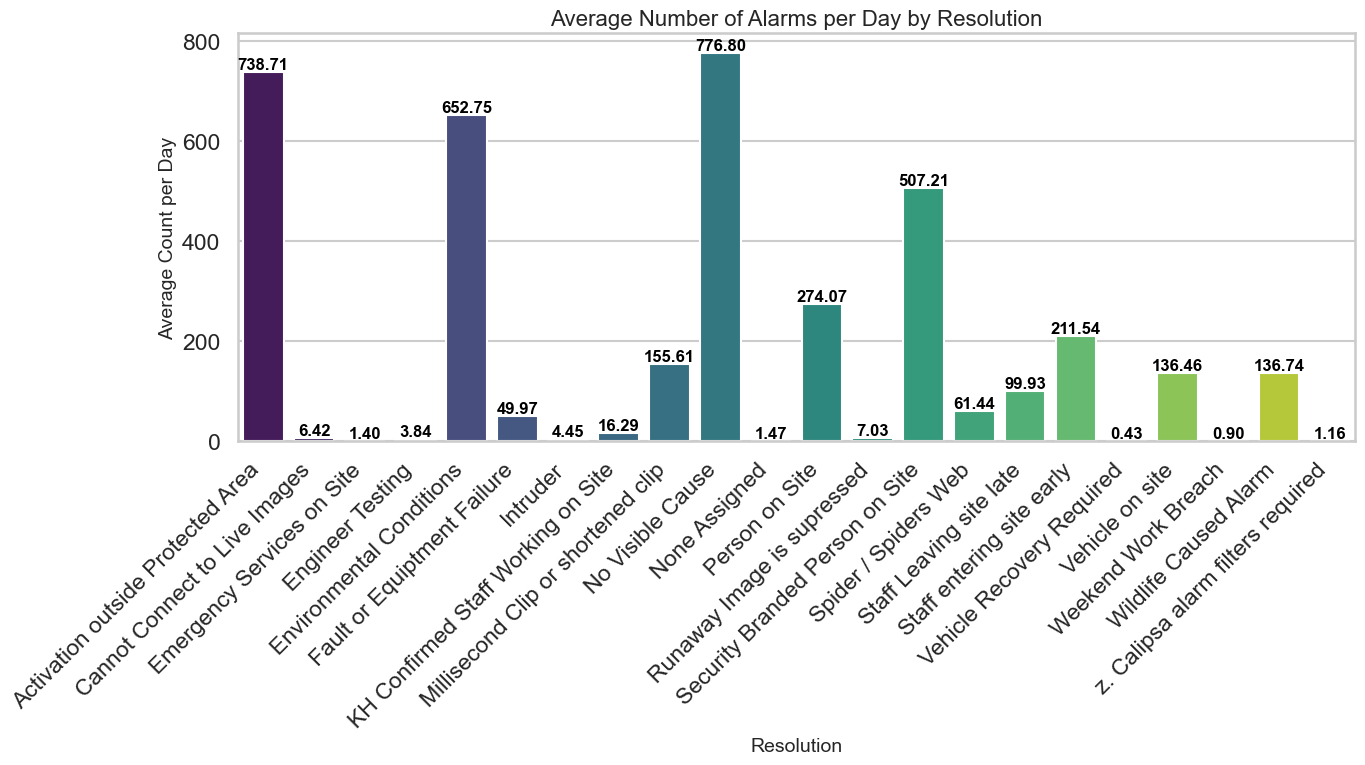

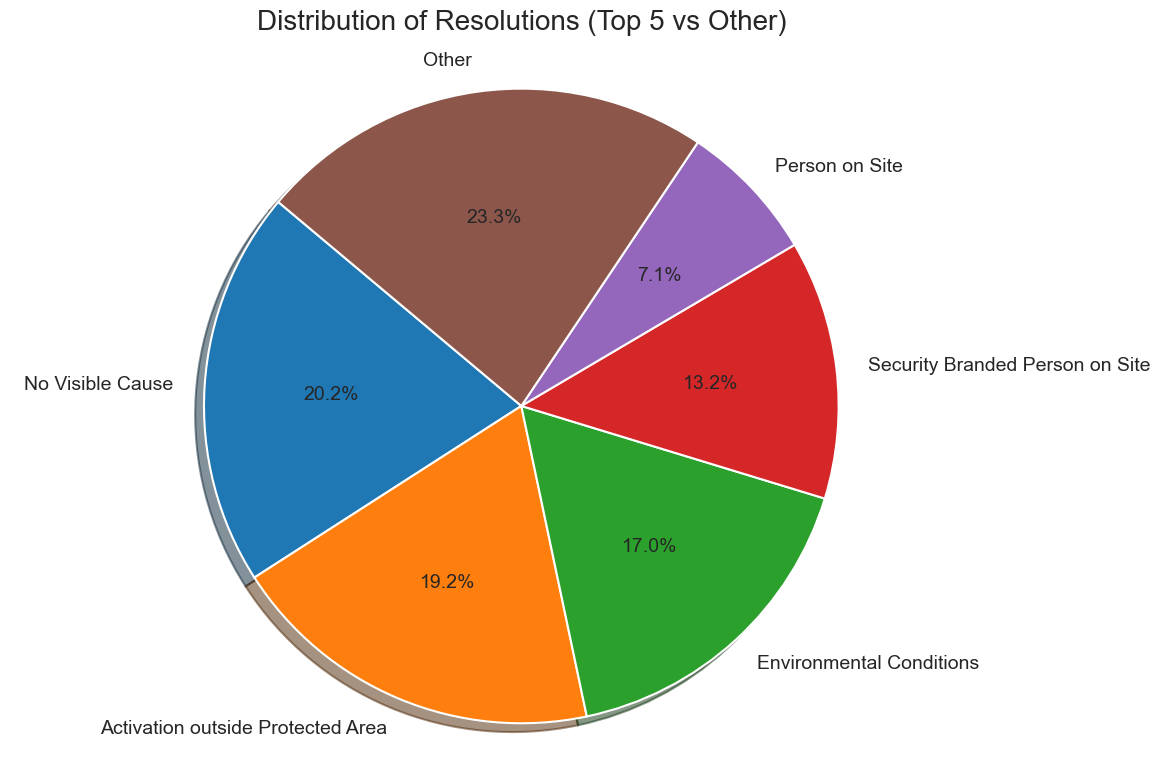

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Handling Time' to timedelta if needed (kept for context; may not be used in this plot)
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])

# Calculate average number of each resolution per day
filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
avg_resolution_per_day = (
    filtered_df.groupby('Resolution').size() / filtered_df['DateOnly'].nunique()
).reset_index(name='Average Count per Day')

# Use seaborn to produce an attractive bar plot with x-axis as Resolution and y-axis as Average Count per Day
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=avg_resolution_per_day, 
    x='Resolution', 
    y='Average Count per Day', 
    palette='viridis'
)
plt.title('Average Number of Alarms per Day by Resolution', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Count per Day', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the actual average count value
for index, row in avg_resolution_per_day.iterrows():
    barplot.text(
        index, 
        row['Average Count per Day'] + 0.05,  # slight vertical offset above the bar
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom",
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Count the occurrences of each resolution from the filtered DataFrame
resolution_counts = filtered_df['Resolution'].value_counts()

# Get top five resolutions and aggregate the rest as 'Other'
top_five = resolution_counts.nlargest(5)
other_count = resolution_counts.iloc[5:].sum()

labels = list(top_five.index) + ['Other']
sizes = list(top_five.values) + [other_count]

# Use a high-contrast palette (matplotlib's tab10) for distinctly different colors
custom_colors = plt.cm.tab10(range(len(labels)))

# Plot a pie chart without a hole in the middle
plt.figure(figsize=(12, 8))
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=custom_colors,
        shadow=True,
        textprops={'fontsize': 14})

plt.title('Distribution of Resolutions (Top 5 vs Other)', fontsize=20, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1138400992.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')


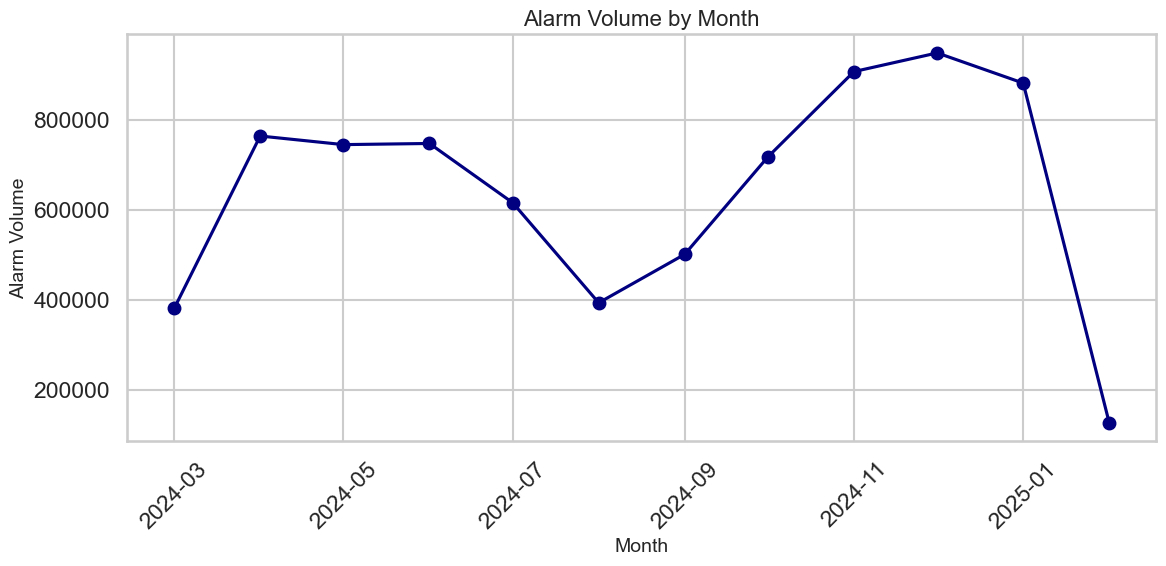

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Group by month (using year-month period) and count the number of alarms per month
monthly_counts = (
    combined_df.groupby(combined_df['Event Date'].dt.to_period('M'))
               .size()
               .reset_index(name='Count')
)

# Convert the Period to a timestamp for plotting
monthly_counts['Event Date'] = monthly_counts['Event Date'].dt.to_timestamp()

# Plot the monthly alarm volume
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['Event Date'], monthly_counts['Count'], marker='o', linestyle='-', color='navy')
plt.title("Alarm Volume by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Alarm Volume", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for site 'George Leslie'
site_df = combined_df[combined_df['Link Account'] == 'George Leslie']

# Define date ranges (start and end dates); using ISO format for dates
date_ranges = {
    "01/04/2024-30/06/2024": ("2024-04-01", "2024-06-30"),
    "01/07/2024-30/09/2024": ("2024-07-01", "2024-09-30"),
    "01/10/2024-31/12/2024": ("2024-10-01", "2024-12-31"),
    "01/01/2025-31/03/2025": ("2025-01-01", "2025-03-31"),
}

# Loop through each date range, filter for non-null 'Handling Time', and print the alarm count
for label, (start_date, end_date) in date_ranges.items():
    mask = (
        (site_df['Event Date'] >= start_date) &
        (site_df['Event Date'] <= end_date) &
        (site_df['Handling Time'].notnull())
    )
    count = site_df.loc[mask].shape[0]
    print(f"Alarms for {label}: {count}")


Alarms for 01/04/2024-30/06/2024: 2020
Alarms for 01/07/2024-30/09/2024: 5234
Alarms for 01/10/2024-31/12/2024: 10704
Alarms for 01/01/2025-31/03/2025: 3110


In [52]:
import pandas as pd

# Ensure 'Event Date' is in datetime format and 'Handling Time' is converted to a timedelta
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')
combined_df['Handling Time'] = pd.to_timedelta(combined_df['Handling Time'], errors='coerce')

# Filter for records from George Leslie which have a non-null Handling Time (i.e., valid alarms)
gl_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
                     (combined_df['Handling Time'].notnull())]

# Display the raw data for 'George Leslie' site with non-null 'Handling Time'
print("Raw data for 'George Leslie' site with non-null 'Handling Time':")
print(gl_df.head())

# Identify rows with massive handling times (e.g., greater than 1 day)
massive_handling_times = gl_df[gl_df['Handling Time'] > pd.Timedelta(days=1)]

print("\nRows with massive handling times (greater than 1 day):")
print(massive_handling_times)

# Group the data by quarter based on 'Event Date' and sum the Handling Times for each quarter
quarterly_resolution_time = (
    gl_df.groupby(gl_df['Event Date'].dt.to_period('Q'))['Handling Time']
         .sum()
         .reset_index()
)

# Optionally, convert the total resolution time to hours for easier interpretation
quarterly_resolution_time['Total Hours'] = quarterly_resolution_time['Handling Time'].apply(lambda td: td.total_seconds() / 3600)

print("Total Resolution Time per Quarter for George Leslie alarms:")
print(quarterly_resolution_time)


Raw data for 'George Leslie' site with non-null 'Handling Time':
                          Site Name Post Code   Link Account Event Date  \
15277  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-14   
15279  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-14   
15280  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   
15282  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   
15283  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   

      Event Time                                       Event Detail  \
15277   18:43:05  Line Crossed T:TM155D(1) A:1 C:13 Cam 13 2024/...   
15279   21:37:30  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15280   00:21:27  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15282   02:32:38  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15283   04:20:08  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   

                     Resolution   Handling Time     Insta

In [53]:
# Assuming previous cells have been run and gl_df is defined as:
# gl_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
#                      (combined_df['Handling Time'].notnull())]

# Sort by Handling Time descending and select the top 10 records
top_ten = gl_df.sort_values(by='Handling Time', ascending=False).head(10)

print("Top 10 Largest Handling Times for George Leslie:")
print(top_ten[['Event Date', 'Handling Time']])

Top 10 Largest Handling Times for George Leslie:
        Event Date   Handling Time
2585384 2024-06-28 0 days 08:56:27
1372898 2024-05-12 0 days 06:59:15
5329188 2024-11-16 0 days 06:53:56
5264161 2024-11-14 0 days 05:46:08
5424182 2024-11-19 0 days 05:33:52
5294348 2024-11-15 0 days 05:20:36
5424187 2024-11-19 0 days 05:06:11
4431364 2024-10-11 0 days 04:59:55
6652833 2024-12-28 0 days 04:48:04
5451431 2024-11-20 0 days 04:45:10


In [54]:
# Filter the George Leslie data for records in Q4 (October, November, December)
q4_gl_df = gl_df[gl_df['Event Date'].dt.quarter == 4]

# Display all handling times for Q4
print("Handling Times for George Leslie for Q4:")
print(q4_gl_df[['Event Date', 'Handling Time']])

# Sum the handling times for George Leslie in Q4
q4_total_handling_time = q4_gl_df['Handling Time'].sum()

print("Total Handling Time for George Leslie in Q4:", q4_total_handling_time)

Handling Times for George Leslie for Q4:
        Event Date   Handling Time
4150422 2024-10-01 0 days 00:00:42
4150424 2024-10-01 0 days 00:00:22
4150425 2024-10-01 0 days 00:08:18
4150427 2024-10-01 0 days 00:07:58
4152425 2024-10-01 0 days 00:02:07
...            ...             ...
6737665 2024-12-31 0 days 00:00:18
6737666 2024-12-31 0 days 00:00:51
6737669 2024-12-31 0 days 00:08:01
6738580 2024-12-31 0 days 00:18:53
6738581 2024-12-31 0 days 00:17:03

[10704 rows x 2 columns]
Total Handling Time for George Leslie in Q4: 106 days 03:22:07


In [55]:
import pandas as pd

# Ensure 'Event Date' is in datetime format in case it isn't already
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter all alarms for Q4 (October, November, December)
q4_df = combined_df[combined_df['Event Date'].dt.quarter == 4]

# Count total alarms in Q4
total_q4_alarms = q4_df.shape[0]

# Filter for George Leslie alarms in Q4
gl_q4_df = q4_df[q4_df['Link Account'] == 'George Leslie']
gl_q4_alarms = gl_q4_df.shape[0]

# Calculate percentage of Q4 alarms that are George Leslie
percentage_gl = (gl_q4_alarms / total_q4_alarms) * 100 if total_q4_alarms else 0

print(f"George Leslie alarms in Q4: {gl_q4_alarms}")
print(f"Total alarms in Q4: {total_q4_alarms}")
print(f"Percentage of alarms that are George Leslie in Q4: {percentage_gl:.2f}%")

George Leslie alarms in Q4: 86447
Total alarms in Q4: 2576682
Percentage of alarms that are George Leslie in Q4: 3.35%


In [56]:
import pandas as pd

# Ensure 'Event Date' is in datetime format (if not already)
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for alarms in Q4 (October, November, December)
q4_df = combined_df[combined_df['Event Date'].dt.quarter == 4]

# Sum the total handling time for all alarms in Q4
total_handling_time_q4 = q4_df['Handling Time'].sum()

print("Total Handling Time for all alarms in Q4:", total_handling_time_q4)

Total Handling Time for all alarms in Q4: 2509 days 01:13:26


In [57]:
# Print out the timedelta components (days, hours, minutes, seconds) for a few Handling Time values
print("Timedelta components for sample Handling Time values:")
print(gl_df['Handling Time'].dt.components.head())

# Alternatively, convert the Handling Time values to total seconds, minutes, and hours
gl_df['Total Seconds'] = gl_df['Handling Time'].dt.total_seconds()
gl_df['Total Minutes'] = gl_df['Total Seconds'] / 60
gl_df['Total Hours'] = gl_df['Total Seconds'] / 3600

print("\nSample conversion of Handling Time to seconds, minutes, and hours:")
print(gl_df[['Handling Time', 'Total Seconds', 'Total Minutes', 'Total Hours']].head())

Timedelta components for sample Handling Time values:
       days  hours  minutes  seconds  milliseconds  microseconds  nanoseconds
15277     0      0       12       22             0             0            0
15279     0      0       12       59             0             0            0
15280     0      0       10       24             0             0            0
15282     0      0        1       22             0             0            0
15283     0      0        0       40             0             0            0

Sample conversion of Handling Time to seconds, minutes, and hours:
        Handling Time  Total Seconds  Total Minutes  Total Hours
15277 0 days 00:12:22          742.0      12.366667     0.206111
15279 0 days 00:12:59          779.0      12.983333     0.216389
15280 0 days 00:10:24          624.0      10.400000     0.173333
15282 0 days 00:01:22           82.0       1.366667     0.022778
15283 0 days 00:00:40           40.0       0.666667     0.011111


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3444456380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gl_df['Total Seconds'] = gl_df['Handling Time'].dt.total_seconds()
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3444456380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gl_df['Total Minutes'] = gl_df['Total Seconds'] / 60
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3444456380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [58]:
import pandas as pd

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for George Leslie alarms with a resolution type of "Intruder"
site_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
                      (combined_df['Resolution'] == 'Intruder')]

# Group by quarter (using the 'Event Date') and count the number of intruder alarms per quarter
intruder_counts = site_df.groupby(site_df['Event Date'].dt.to_period('Q')).size().reset_index(name='Intruder Count')

print("Intruder Counts per Quarter for George Leslie:")
print(intruder_counts)

Intruder Counts per Quarter for George Leslie:
  Event Date  Intruder Count
0     2024Q2               3
1     2024Q3               1
2     2024Q4               4


In [59]:

# Ensure "Handling Time" is converted to a timedelta
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')

# Group by resolution and calculate the average handling time
avg_handling_time = filtered_df.groupby('Resolution')['Handling Time'].mean().reset_index()

# Display the result
print("Average Handling Time per Resolution:")
print(avg_handling_time)


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\4108388677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')


Average Handling Time per Resolution:
                            Resolution             Handling Time
0    Activation outside Protected Area 0 days 00:11:08.097791784
1        Cannot Connect to Live Images 0 days 00:10:50.761553588
2           Emergency Services on Site 0 days 00:18:45.006756756
3                     Engineer Testing 0 days 00:14:43.490131578
4             Environmental Conditions 0 days 00:08:03.663336909
5          Fault or Equiptment Failure 0 days 00:14:30.121196818
6                             Intruder 0 days 00:32:40.441843971
7   KH Confirmed Staff Working on Site 0 days 00:14:01.468925459
8   Millisecond Clip or shortened clip 0 days 00:08:05.912625689
9                     No Visible Cause 0 days 00:07:52.775737369
10                       None Assigned 0 days 00:06:43.214132762
11                      Person on Site 0 days 00:11:01.204799723
12          Runaway Image is supressed 0 days 00:08:07.523339317
13     Security Branded Person on Site 0 days 00:08:

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\730262959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\730262959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce').dt.date
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\730262959.py:25: FutureWar

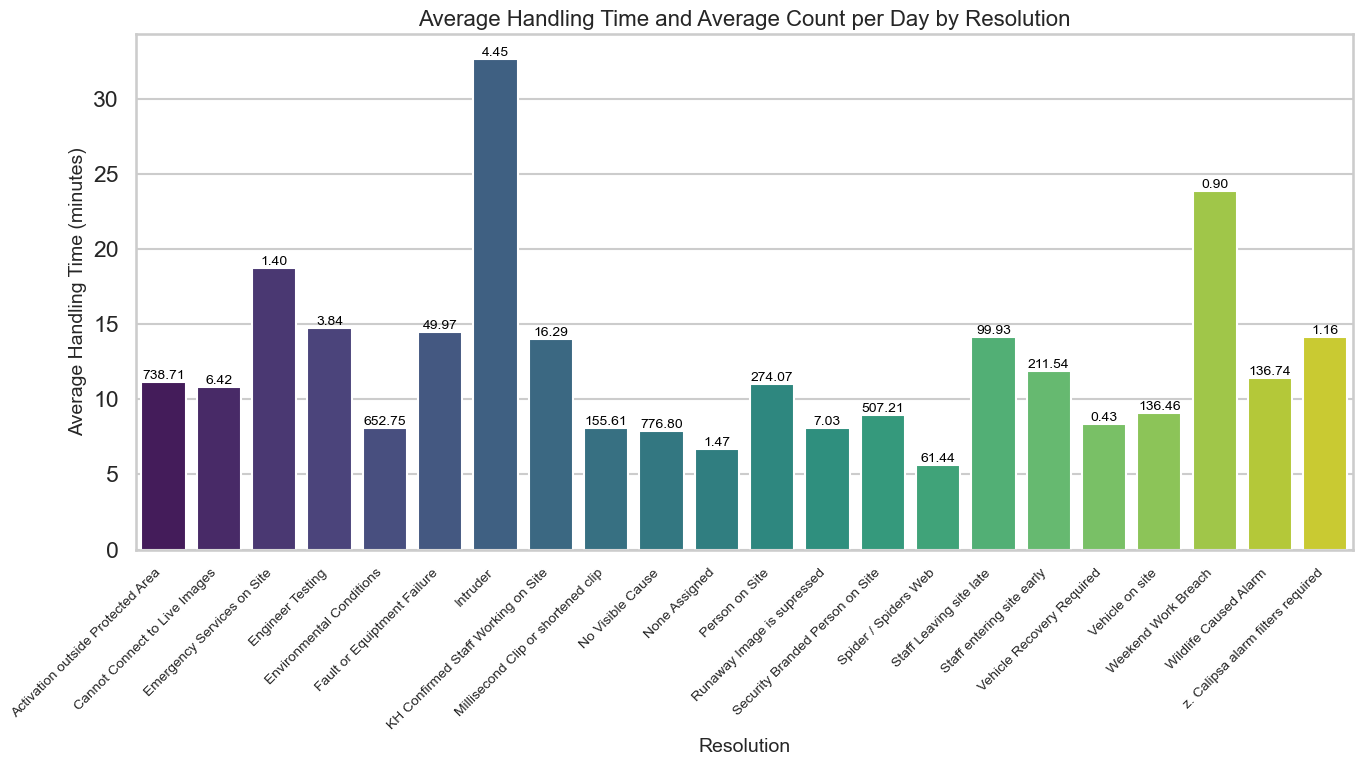

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Handling Time' is a timedelta
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')

# Calculate average handling time per resolution
avg_response_time = filtered_df.groupby('Resolution')['Handling Time'].mean().reset_index()
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Convert 'Event Date' to datetime and extract the date portion
filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce').dt.date

# Calculate the total count of each resolution and then average per day
resolution_counts = filtered_df.groupby('Resolution').size().reset_index(name='Total Count')
num_days = filtered_df['DateOnly'].nunique()
resolution_counts['Average Count per Day'] = resolution_counts['Total Count'] / num_days

# Merge average handling time with average count per day by resolution
merged_df = pd.merge(avg_response_time, resolution_counts[['Resolution', 'Average Count per Day']], on='Resolution')

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=merged_df, 
    x='Resolution', 
    y='Handling Time (minutes)', 
    palette='viridis'
)
plt.title('Average Handling Time and Average Count per Day by Resolution', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)

# Make x-axis labels smaller
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate each bar with the average count per day using a smaller font
for index, row in merged_df.iterrows():
    barplot.text(
        index, 
        row['Handling Time (minutes)'], 
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom", 
        fontsize=10
    )

plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\2920643993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\2920643993.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\2920643993.py:10: SettingWithCo

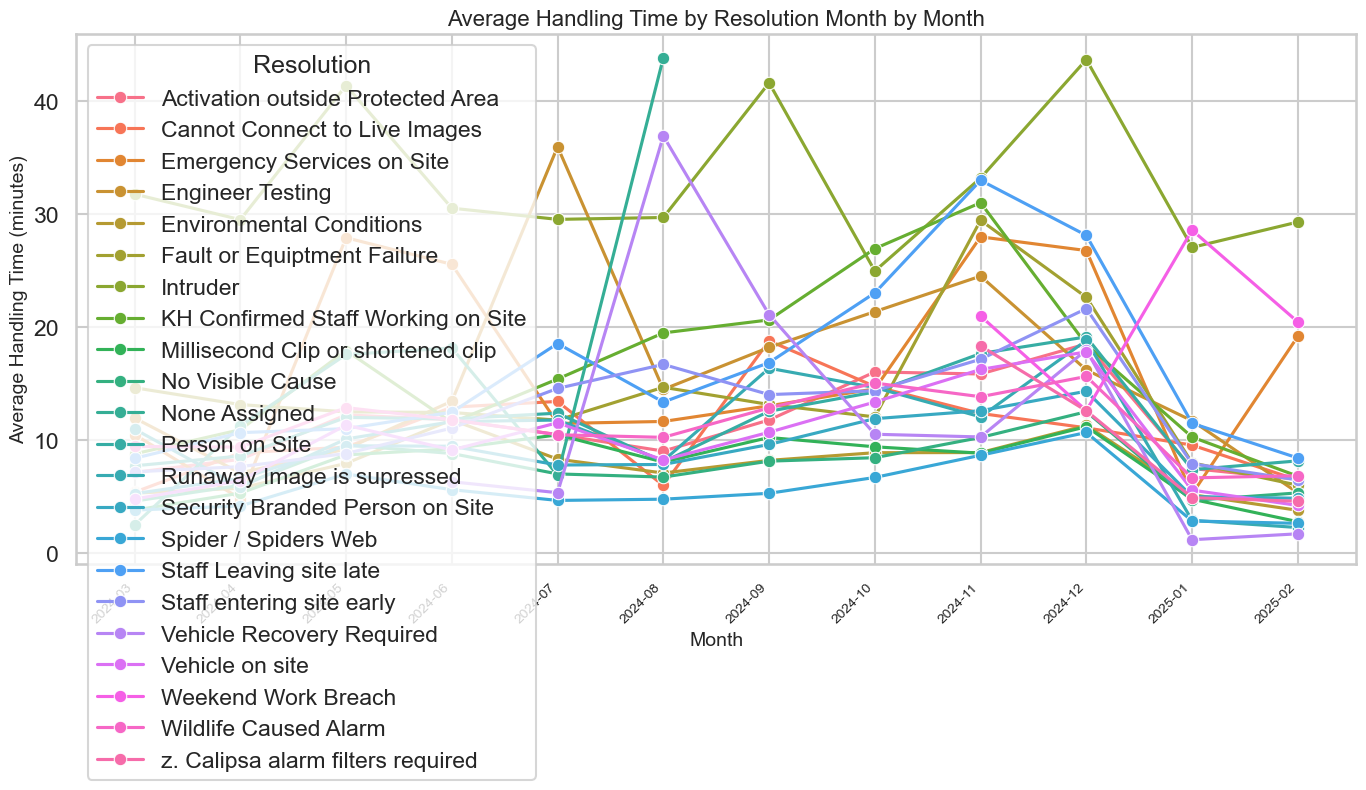

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Handling Time' is a timedelta
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')

# Convert 'Event Date' to datetime and create a Month column (e.g., "2022-08")
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['Month'] = filtered_df['Event Date'].dt.to_period('M').astype(str)

# Group by Resolution and Month to calculate average handling time
avg_handling_by_month = filtered_df.groupby(['Resolution', 'Month'])['Handling Time'].mean().reset_index()
avg_handling_by_month['Handling Time (minutes)'] = avg_handling_by_month['Handling Time'].dt.total_seconds() / 60

# Plotting with a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=avg_handling_by_month, 
    x='Month', 
    y='Handling Time (minutes)', 
    hue='Resolution', 
    marker='o'
)
plt.title('Average Handling Time by Resolution Month by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\505955474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\505955474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\505955474.py:10: SettingWithCopyW

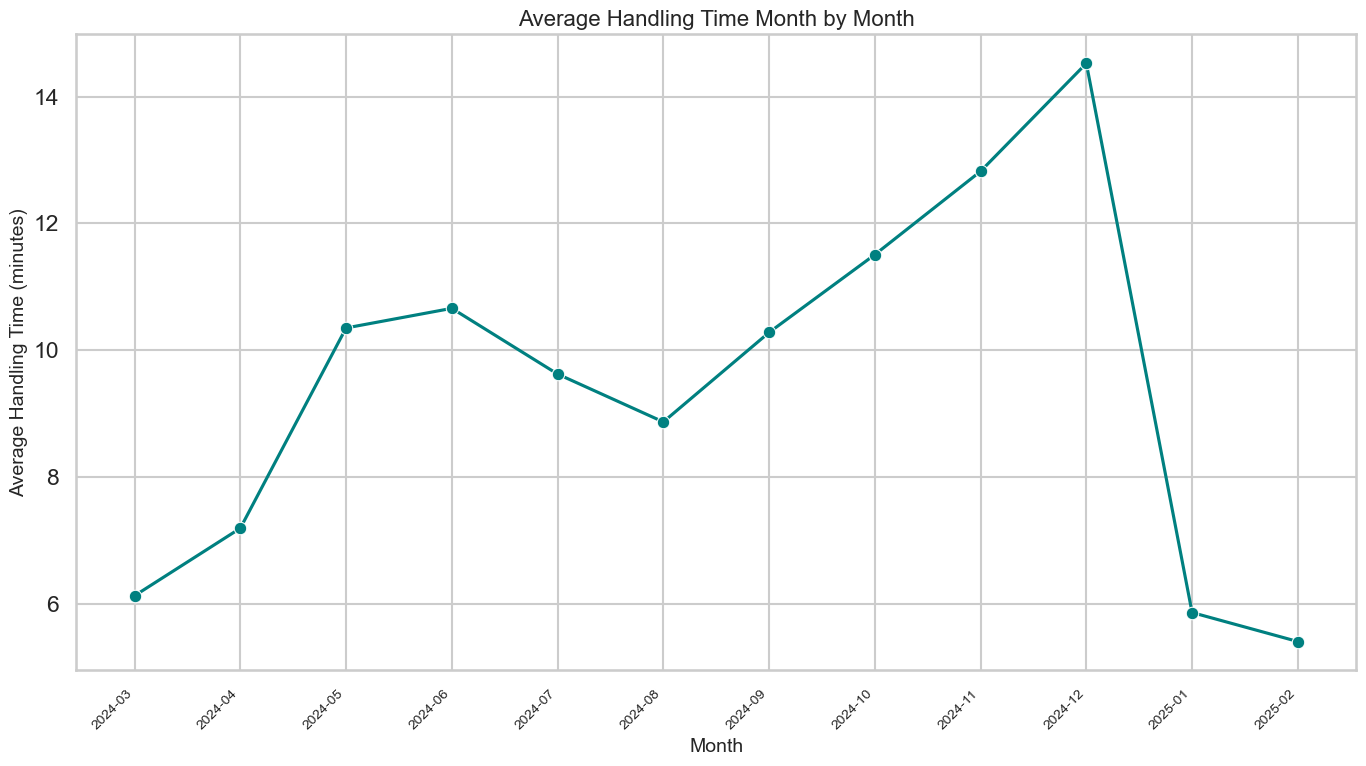

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Handling Time' is a timedelta
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce')

# Convert 'Event Date' to datetime and create a Month column (e.g., "2022-08")
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['Month'] = filtered_df['Event Date'].dt.to_period('M').astype(str)

# Group by Month to calculate average handling time
monthly_avg_handling = filtered_df.groupby('Month')['Handling Time'].mean().reset_index()
monthly_avg_handling['Handling Time (minutes)'] = monthly_avg_handling['Handling Time'].dt.total_seconds() / 60

# Plot the average handling time month by month
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_avg_handling, 
    x='Month', 
    y='Handling Time (minutes)', 
    marker='o', 
    color='teal'
)
plt.title('Average Handling Time Month by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd

file_path = r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\Incident Overview MASTER 2023(2024).xlsx"
df = pd.read_excel(file_path)
print(df.head())
print(df.columns)

  Incident Ref Number Date of incident Time of incident           Account   \
0    PSM-02012024-001       2024-01-01          02:58:00      Prime Secure   
1    PSM-01012024-002       2024-01-02          12:33:00      Prime Secure   
2    PSM-01012024-003       2024-01-02          13:46:00      Prime Secure   
3    PSM-01012024-004       2024-01-03          00:00:00      Prime Secure   
4    PSM-03012024-005       2024-01-03          17:53:00  Select Solutions   

          Region                       Client          Account ID  Tier  \
0  Scotland West  BAM Construction (Scotland)  352686000001998976  Gold   
1  Scotland West                         Amey  352686000000625024     0   
2  Scotland West                 Urban Union                  NaN   NaN   
3  ENGLAND SOUTH              Boutique Modern  352686000001542016     0   
4  Scotland West                Taylor Wimpey                   0     0   

   Postcode System ID  ...    OPEN AONC Missed  \
0  KY11 8EX       NaN  ...  CL

In [64]:
import pandas as pd

file_path = r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\Incident Overview MASTER 2023(2024).xlsx"
incident_df = pd.read_excel(file_path)

# Check if 'C/M ' column exists
if 'C/M ' in incident_df.columns:
	# Filter for rows where 'M/S' is "Prime Secure Monitoring" and 'C/M ' is "Missed"
	filtered_incident_df = incident_df[(incident_df['M/S'] == 'Prime Secure Monitoring') & (incident_df['C/M '] == 'Missed')]
	# Display a preview of the filtered data
	print(filtered_incident_df.head())
else:
	print("Column 'C/M ' does not exist in the DataFrame.")
	# Display all column names in the DataFrame
	print("Column names in the DataFrame:")
	print(incident_df.columns.tolist())

   Incident Ref Number Date of incident Time of incident       Account   \
3     PSM-01012024-004       2024-01-03          00:00:00  Prime Secure   
6     PSM-04012024-007       2024-01-05          18:40:00  Prime Secure   
7     PSM-05012024-008       2024-01-05          00:00:00  Prime Secure   
18    PSM-08012024-019       2024-01-08          00:00:00  Prime Secure   
19    PSM-09012024-020       2024-01-09          00:00:00  Prime Secure   

           Region                   Client          Account ID  Tier  \
3   ENGLAND SOUTH          Boutique Modern  352686000001542016     0   
6   England South          Toppesfield Ltd                   0     0   
7   Scotland West        George Leslie Ltd  352686000002012032  Gold   
18  SCOTLAND WEST  Dundas Building Co. Ltd                   0     0   
19  SCOTLAND WEST    Barratt East Scotland  352686000000620992  Gold   

    Postcode System ID  ...    OPEN AONC Missed  \
3    BN7 2SN     TA114  ...  CLOSED         Yes   
6   DE21 7NT  

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1728485778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1728485778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Event Date'].dt.to_period('M').astype(str)


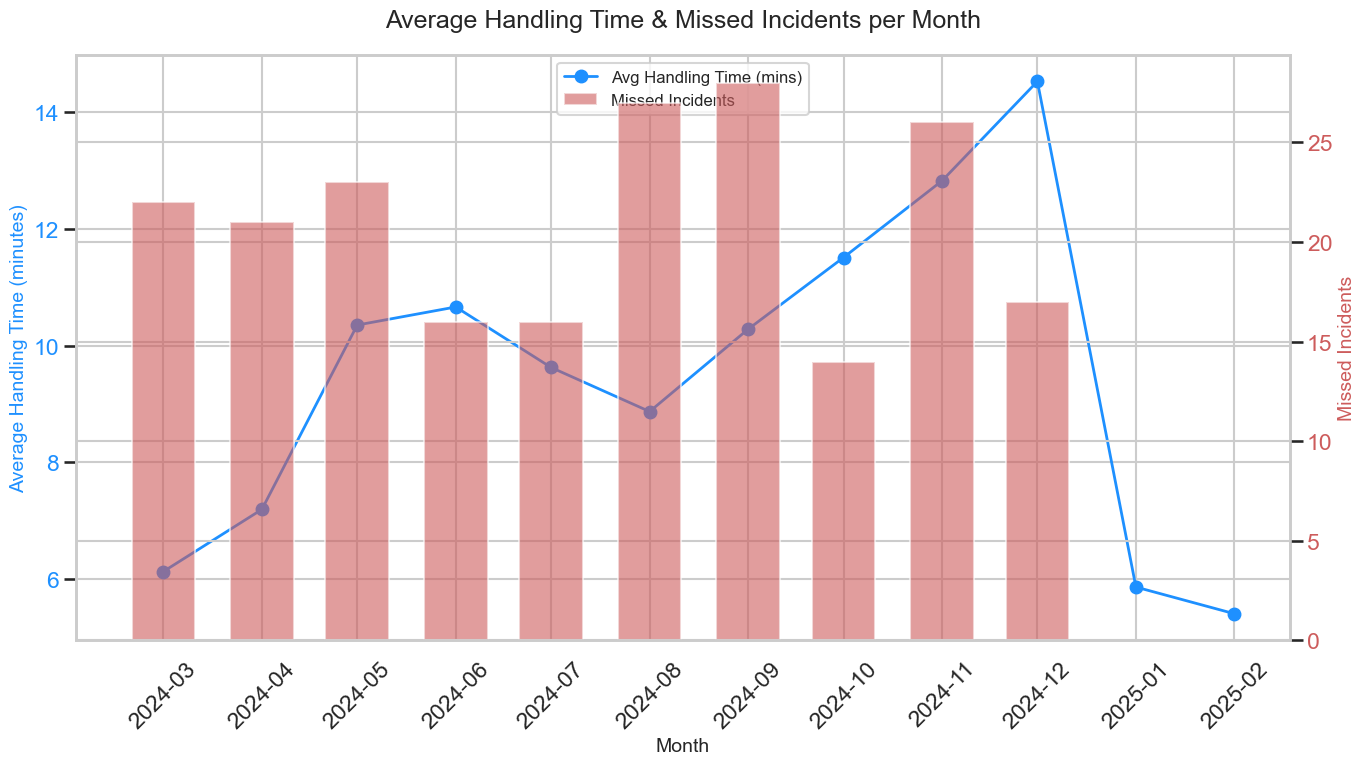

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice seaborn style
sns.set_style('whitegrid')

# -------------------------------
# 1. Prepare the average handling time per month data
# (Using filtered_df that has 'Event Date' & 'Handling Time')
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['Month'] = filtered_df['Event Date'].dt.to_period('M').astype(str)
monthly_avg_handling = filtered_df.groupby('Month')['Handling Time'].mean().reset_index()
monthly_avg_handling['Handling Time (minutes)'] = monthly_avg_handling['Handling Time'].dt.total_seconds() / 60
monthly_avg_handling['Month_dt'] = pd.to_datetime(monthly_avg_handling['Month'] + "-01")

# -------------------------------
# 2. Prepare the missed incidents per month data.
incident_df = pd.read_excel(r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\Incident Overview MASTER 2023(2024).xlsx")
incident_df['Date of incident'] = pd.to_datetime(incident_df['Date of incident'], errors='coerce')
# Filter missed incidents by ensuring 'C/M ' equals 'Missed'
missed_df = incident_df[incident_df["C/M "].astype(str).str.strip() == 'Missed']
missed_monthly = (
    missed_df.groupby(missed_df['Date of incident'].dt.to_period('M')).size()
    .reset_index(name='Missed Count')
)
missed_monthly['Month'] = missed_monthly['Date of incident'].dt.to_timestamp()

# -------------------------------
# 3. Merge the two monthly summaries on the month column.
combined = pd.merge(
    monthly_avg_handling,
    missed_monthly,
    left_on='Month_dt',
    right_on='Month',
    how='outer'
).sort_values('Month_dt')

# -------------------------------
# 4. Plot on a dual-axis chart with enhanced aesthetics.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Plot the average handling time as a line on the primary y-axis.
line_color = 'dodgerblue'
ax1.plot(combined['Month_dt'], combined['Handling Time (minutes)'],
         marker='o', color=line_color, label='Avg Handling Time (mins)', linewidth=2)
ax1.set_xlabel("Month", fontsize=14)
ax1.set_ylabel("Average Handling Time (minutes)", color=line_color, fontsize=14)
ax1.tick_params(axis='y', labelcolor=line_color)
ax1.set_xticks(combined['Month_dt'])
ax1.set_xticklabels(combined['Month_dt'].dt.strftime('%Y-%m'), rotation=45)

# Plot the missed incidents as a bar chart on the secondary y-axis.
bar_color = 'indianred'
bar_width = 20  # Adjust bar width to better display the bars
ax2.bar(combined['Month_dt'], combined['Missed Count'], 
        alpha=0.6, color=bar_color, label='Missed Incidents', width=bar_width)
ax2.set_ylabel("Missed Incidents", color=bar_color, fontsize=14)
ax2.tick_params(axis='y', labelcolor=bar_color)

# Create a combined legend by gathering handles from both axes.
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper center', fontsize=12)

plt.title("Average Handling Time & Missed Incidents per Month", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

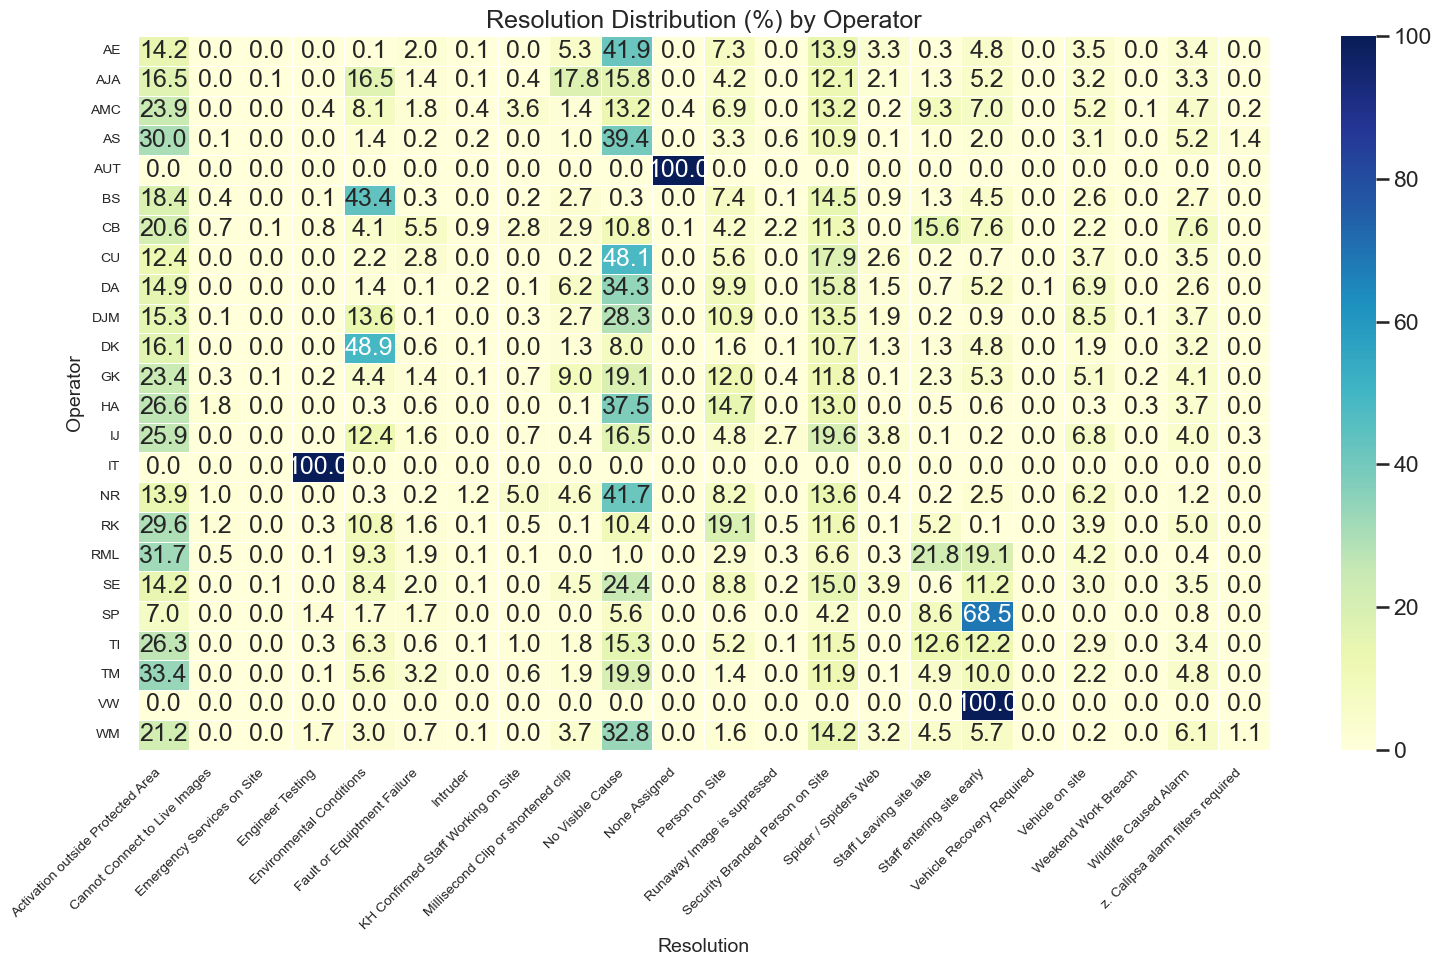

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the resolution percentage distribution per operator
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_pct, annot=True, fmt=".1f", linewidths=0.5, cmap="YlGnBu")
plt.title("Resolution Distribution (%) by Operator", fontsize=18)
plt.xlabel("Resolution", fontsize=14)
plt.ylabel("Operator", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Operators' Euclidean Distance from Global Average Distribution:
Operator
DK     36.568864
CU     35.145605
BS     33.975256
RML    31.469478
AE     29.786892
RK     17.908644
TM     16.357648
GK     14.118666
IJ     11.658645
dtype: float64


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1323441451.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=operator_distance.index, y=operator_distance.values, palette='viridis')


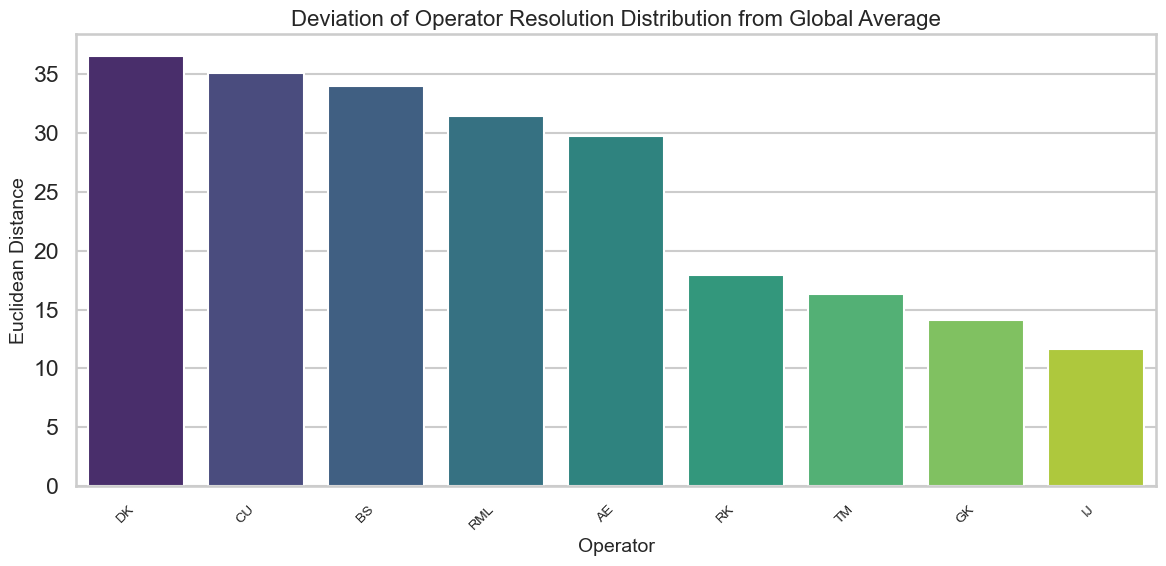


Operators with a deviation greater than (mean + 1 std):
Operator
DK    36.568864
dtype: float64


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the pivot_pct DataFrame for the specified operators
selected_operators = ['GK', 'CU', 'AE', 'BS', 'IJ', 'DK', 'RK', 'TM', 'RML']
filtered_pivot_pct = pivot_pct.loc[selected_operators]

# Calculate the global average distribution across all operators
global_avg = filtered_pivot_pct.mean(axis=0)

# For each operator, calculate the Euclidean distance from the global average
operator_distance = np.sqrt(((filtered_pivot_pct - global_avg) ** 2).sum(axis=1))
operator_distance = operator_distance.sort_values(ascending=False)

# Display the distances to see which operators deviate the most
print("Operators' Euclidean Distance from Global Average Distribution:")
print(operator_distance)

# Plot the distances as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=operator_distance.index, y=operator_distance.values, palette='viridis')
plt.title("Deviation of Operator Resolution Distribution from Global Average", fontsize=16)
plt.xlabel("Operator", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Optionally, highlight any operator whose distance is notably higher than the average
threshold = operator_distance.mean() + operator_distance.std()
print("\nOperators with a deviation greater than (mean + 1 std):")
print(operator_distance[operator_distance > threshold])

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3533685836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3533685836.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


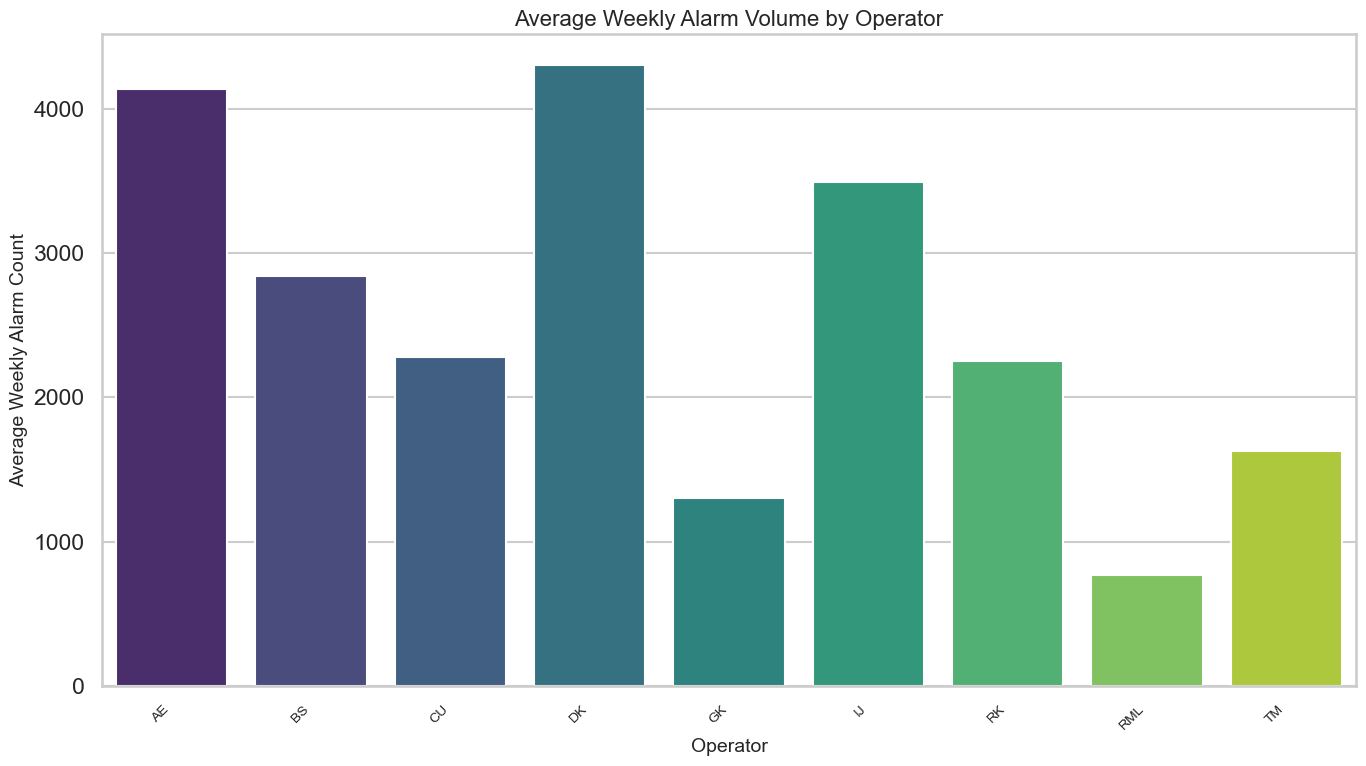

  Operator  Alarm Count
0       AE  4136.581395
1       BS  2837.022727
2       CU  2280.500000
3       DK  4299.108696
4       GK  1300.363636
5       IJ  3490.142857
6       RK  2248.348837
7      RML   770.500000
8       TM  1624.885714


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Event Date' is in datetime format
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')

# Filter for the specified operators
selected_operators = ['GK', 'CU', 'AE', 'BS', 'IJ', 'DK', 'RK', 'TM', 'RML']
filtered_df = filtered_df[filtered_df['Operator'].isin(selected_operators)]

# Create a Week column (using ISO week or Period, here we'll use period as a week)
filtered_df['Week'] = filtered_df['Event Date'].dt.to_period('W').astype(str)

# Group by Operator and Week to count the number of alarms per week per operator
weekly_volume = filtered_df.groupby(['Operator', 'Week']).size().reset_index(name='Alarm Count')

# Calculate the average weekly alarm volume for each operator
avg_weekly_volume = weekly_volume.groupby('Operator')['Alarm Count'].mean().reset_index()

# Plot the average weekly alarm volume by operator
plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_weekly_volume,
    x='Operator',
    y='Alarm Count',
    palette='viridis'
)
plt.title("Average Weekly Alarm Volume by Operator", fontsize=16)
plt.xlabel("Operator", fontsize=14)
plt.ylabel("Average Weekly Alarm Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Optionally, display the data
print(avg_weekly_volume)

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1003616505.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


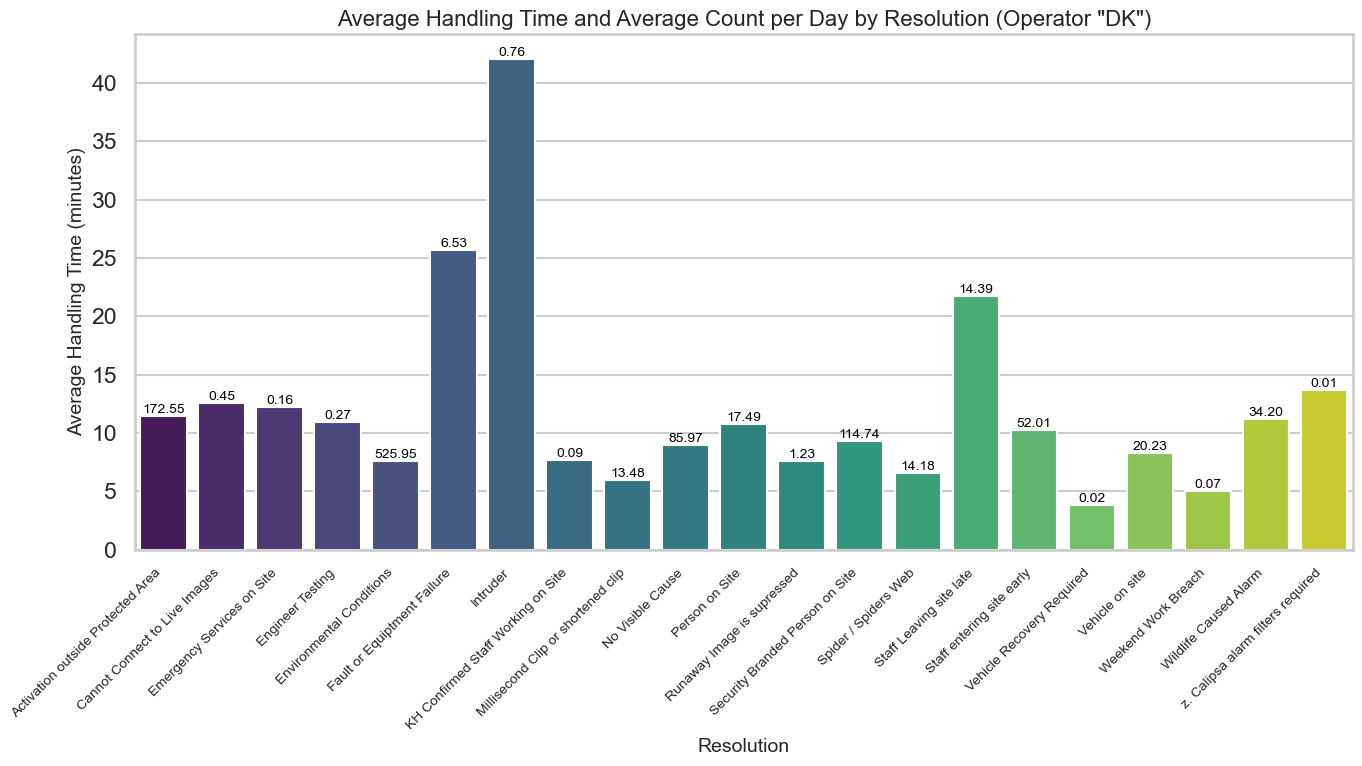

(-1.0999989256808946,
 1.0999978339047511,
 -1.0999996983291809,
 1.0999970594236443)

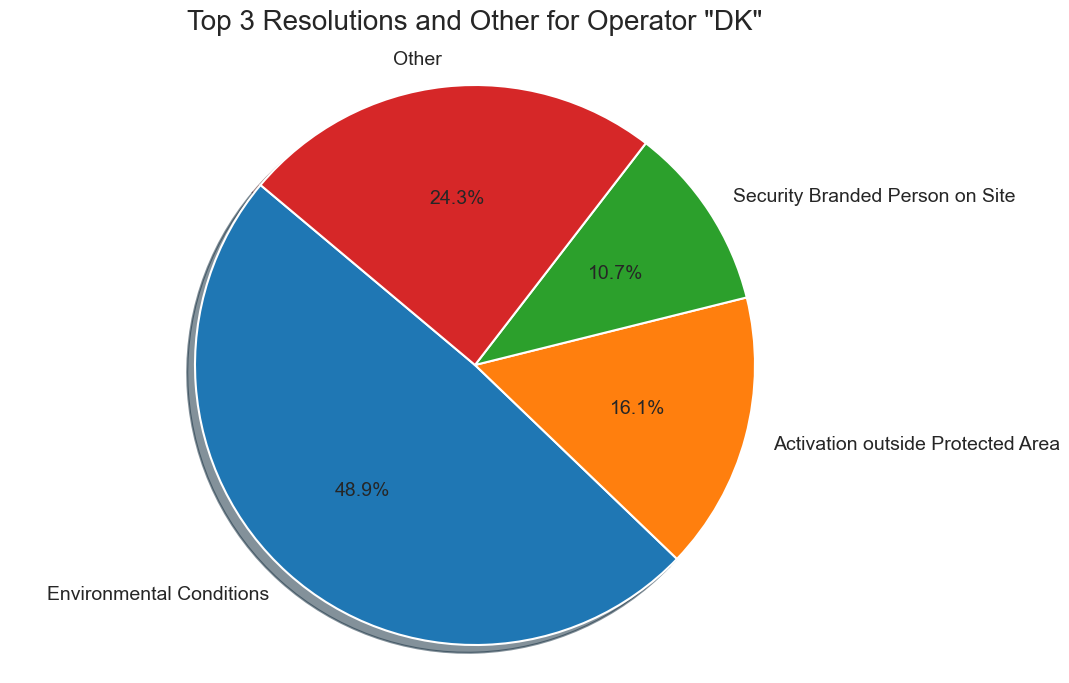

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataframe for operator 'DK'
dk_df = filtered_df[filtered_df['Operator'] == 'DK'].copy()

# Ensure 'Handling Time' is a timedelta
dk_df['Handling Time'] = pd.to_timedelta(dk_df['Handling Time'], errors='coerce')

# Calculate average handling time per resolution for operator 'DK'
avg_response_time = dk_df.groupby('Resolution')['Handling Time'].mean().reset_index()
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Convert 'Event Date' to datetime and extract the date portion
dk_df['DateOnly'] = pd.to_datetime(dk_df['Event Date'], errors='coerce').dt.date

# Calculate the total count of each resolution for operator 'DK' and then average per day
resolution_counts = dk_df.groupby('Resolution').size().reset_index(name='Total Count')
num_days = dk_df['DateOnly'].nunique()
resolution_counts['Average Count per Day'] = resolution_counts['Total Count'] / num_days

# Merge average handling time with average count per day by resolution for operator 'DK'
merged_df = pd.merge(avg_response_time, resolution_counts[['Resolution', 'Average Count per Day']], on='Resolution')

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=merged_df, 
    x='Resolution', 
    y='Handling Time (minutes)', 
    palette='viridis'
)
plt.title('Average Handling Time and Average Count per Day by Resolution (Operator "DK")', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate each bar with the average count per day using a smaller font
for index, row in merged_df.iterrows():
    barplot.text(
        index, 
        row['Handling Time (minutes)'], 
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom", 
        fontsize=10
    )

plt.tight_layout()
plt.show()
# Calculate the total count of each resolution for operator 'DK'
resolution_counts = dk_df['Resolution'].value_counts()

# Get the top three resolutions and aggregate the rest as 'Other'
top_three = resolution_counts.nlargest(3)
other_count = resolution_counts.iloc[3:].sum()

labels = list(top_three.index) + ['Other']
sizes = list(top_three.values) + [other_count]

# Use a high-contrast palette (matplotlib's tab10) for distinctly different colors
custom_colors = plt.cm.tab10(range(len(labels)))

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors,
    shadow=True,
    textprops={'fontsize': 14})

plt.title('Top 3 Resolutions and Other for Operator "DK"', fontsize=20, pad=20)
plt.axis('equal')

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\282932124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


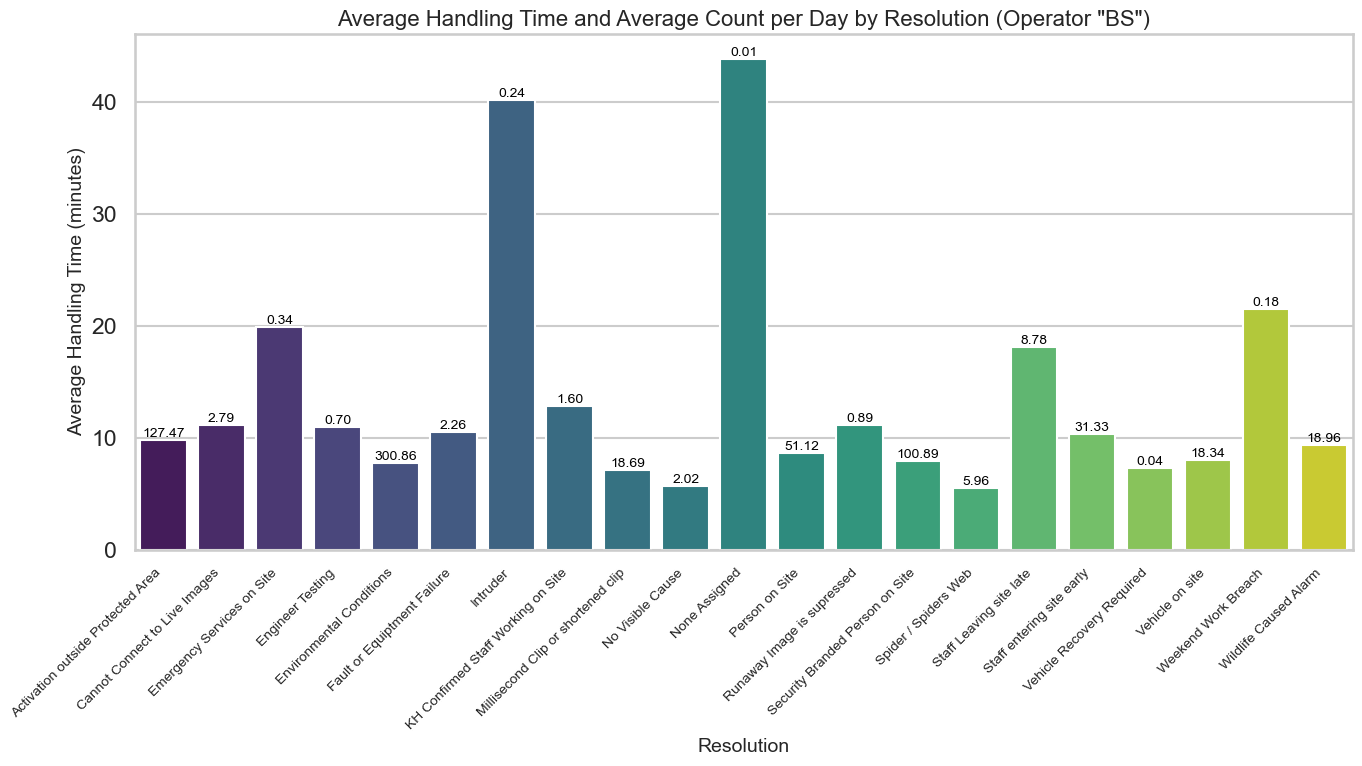

(-1.0999999848343018,
 1.0999999126219737,
 -1.0999908514414534,
 1.0999955042579141)

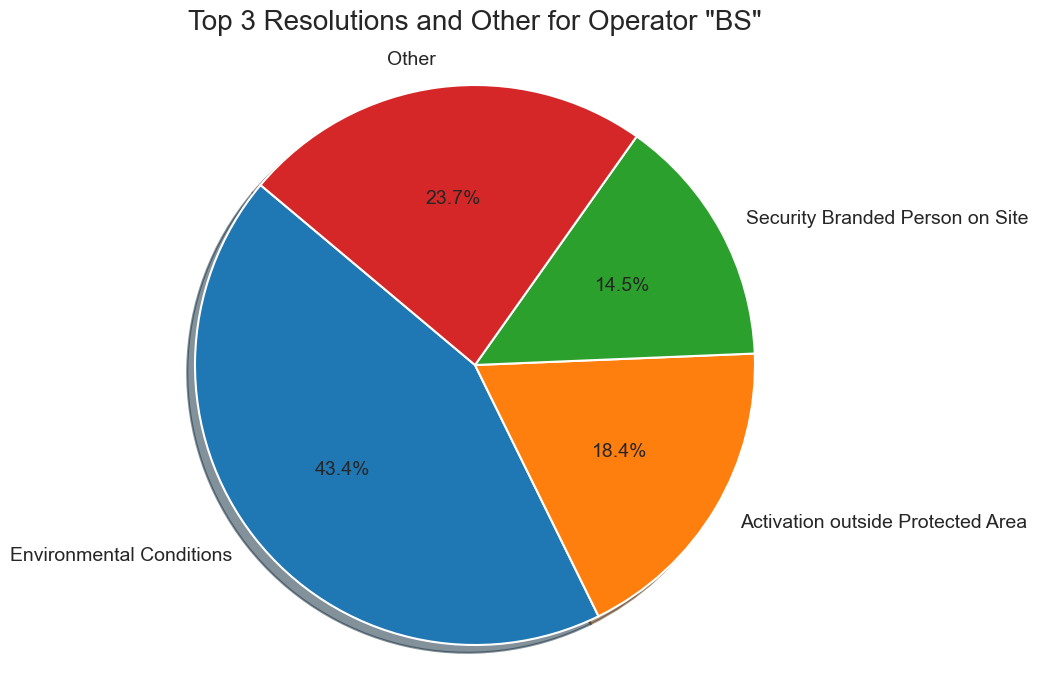

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataframe for operator 'BS'
bs_df = filtered_df[filtered_df['Operator'] == 'BS'].copy()

# Ensure 'Handling Time' is a timedelta
bs_df['Handling Time'] = pd.to_timedelta(bs_df['Handling Time'], errors='coerce')

# Calculate average handling time per resolution for operator 'BS'
avg_response_time = bs_df.groupby('Resolution')['Handling Time'].mean().reset_index()
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Convert 'Event Date' to datetime and extract the date portion
bs_df['DateOnly'] = pd.to_datetime(bs_df['Event Date'], errors='coerce').dt.date

# Calculate the total count of each resolution for operator 'BS' and then average per day
resolution_counts = bs_df.groupby('Resolution').size().reset_index(name='Total Count')
num_days = bs_df['DateOnly'].nunique()
resolution_counts['Average Count per Day'] = resolution_counts['Total Count'] / num_days

# Merge average handling time with average count per day by resolution for operator 'BS'
merged_df = pd.merge(avg_response_time, resolution_counts[['Resolution', 'Average Count per Day']], on='Resolution')

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=merged_df, 
    x='Resolution', 
    y='Handling Time (minutes)', 
    palette='viridis'
)
plt.title('Average Handling Time and Average Count per Day by Resolution (Operator "BS")', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate each bar with the average count per day using a smaller font
for index, row in merged_df.iterrows():
    barplot.text(
        index, 
        row['Handling Time (minutes)'], 
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom", 
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Calculate the total count of each resolution for operator 'DK'
resolution_counts = bs_df['Resolution'].value_counts()

# Get the top three resolutions and aggregate the rest as 'Other'
top_three = resolution_counts.nlargest(3)
other_count = resolution_counts.iloc[3:].sum()

labels = list(top_three.index) + ['Other']
sizes = list(top_three.values) + [other_count]

# Use a high-contrast palette (matplotlib's tab10) for distinctly different colors
custom_colors = plt.cm.tab10(range(len(labels)))

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors,
    shadow=True,
    textprops={'fontsize': 14})

plt.title('Top 3 Resolutions and Other for Operator "BS"', fontsize=20, pad=20)
plt.axis('equal')

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1323560524.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


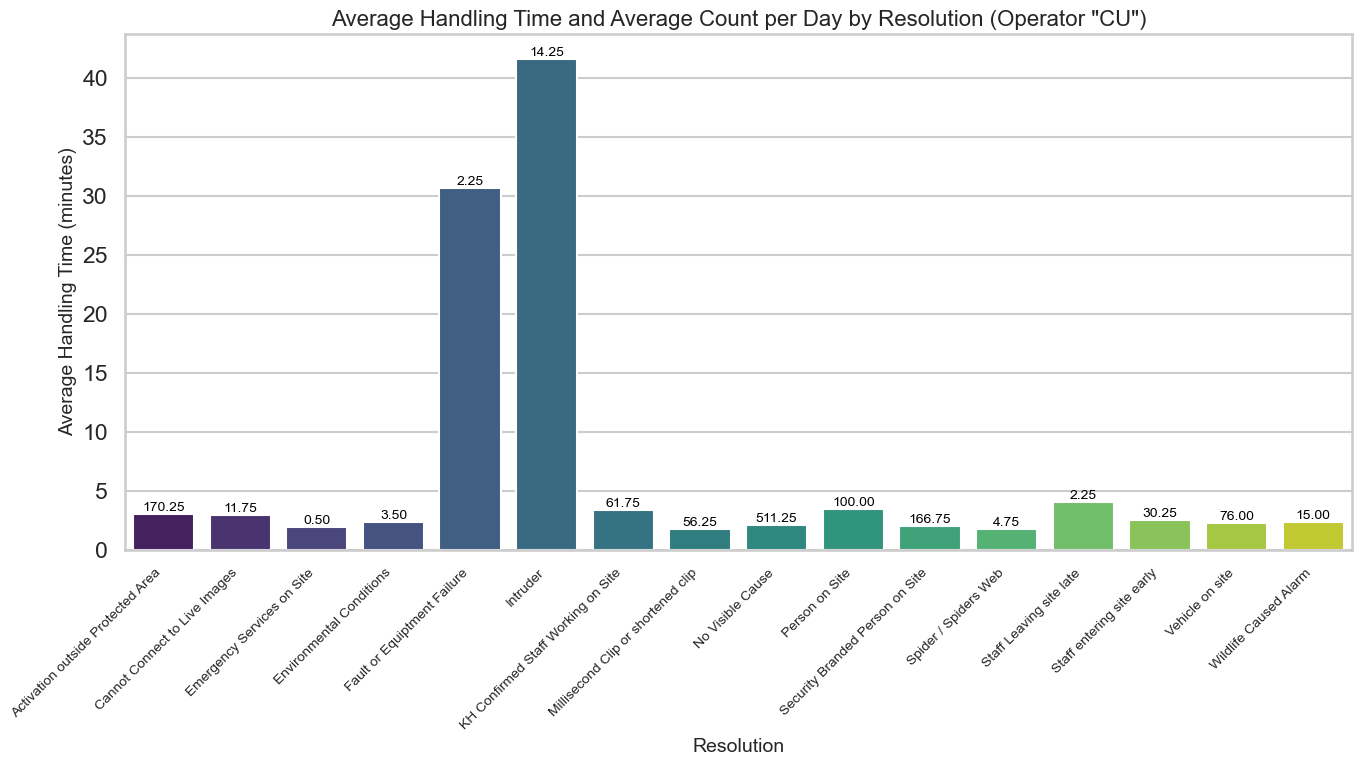

(-1.099999268400015,
 1.0999960295973938,
 -1.0999996711686024,
 1.0999930945409133)

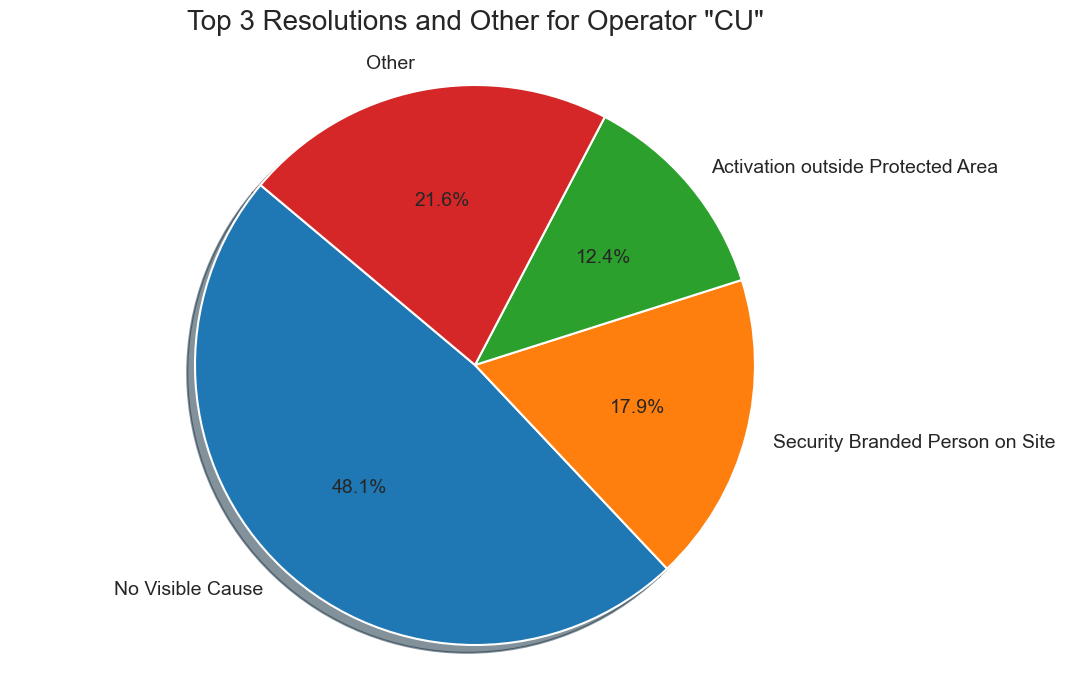

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataframe for operator 'NR'
cu_df = filtered_df[filtered_df['Operator'] == 'CU'].copy()

# Ensure 'Handling Time' is a timedelta
nr_df['Handling Time'] = pd.to_timedelta(nr_df['Handling Time'], errors='coerce')

# Calculate average handling time per resolution for operator 'NR'
avg_response_time = nr_df.groupby('Resolution')['Handling Time'].mean().reset_index()
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Convert 'Event Date' to datetime and extract the date portion
nr_df['DateOnly'] = pd.to_datetime(nr_df['Event Date'], errors='coerce').dt.date

# Calculate the total count of each resolution for operator 'NR' and then average per day
resolution_counts = nr_df.groupby('Resolution').size().reset_index(name='Total Count')
num_days = nr_df['DateOnly'].nunique()
resolution_counts['Average Count per Day'] = resolution_counts['Total Count'] / num_days

# Merge average handling time with average count per day by resolution for operator 'NR'
merged_df = pd.merge(avg_response_time, resolution_counts[['Resolution', 'Average Count per Day']], on='Resolution')

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=merged_df, 
    x='Resolution', 
    y='Handling Time (minutes)', 
    palette='viridis'
)
plt.title('Average Handling Time and Average Count per Day by Resolution (Operator "CU")', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate each bar with the average count per day using a smaller font
for index, row in merged_df.iterrows():
    barplot.text(
        index, 
        row['Handling Time (minutes)'], 
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom", 
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Calculate the total count of each resolution for operator 'DK'
resolution_counts = cu_df['Resolution'].value_counts()

# Get the top three resolutions and aggregate the rest as 'Other'
top_three = resolution_counts.nlargest(3)
other_count = resolution_counts.iloc[3:].sum()

labels = list(top_three.index) + ['Other']
sizes = list(top_three.values) + [other_count]

# Use a high-contrast palette (matplotlib's tab10) for distinctly different colors
custom_colors = plt.cm.tab10(range(len(labels)))

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors,
    shadow=True,
    textprops={'fontsize': 14})

plt.title('Top 3 Resolutions and Other for Operator "CU"', fontsize=20, pad=20)
plt.axis('equal')

In [84]:
import pandas as pd

# Ensure 'Event Date' is in datetime format
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')

# Filter for operator 'NR' and get the most recent alarm date
nr_last_alarm = filtered_df[filtered_df['Operator'] == 'NR']['Event Date'].max()

print("The last time operator NR had an alarm was on:", nr_last_alarm)

The last time operator NR had an alarm was on: 2024-03-21 00:00:00


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\3482430531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')


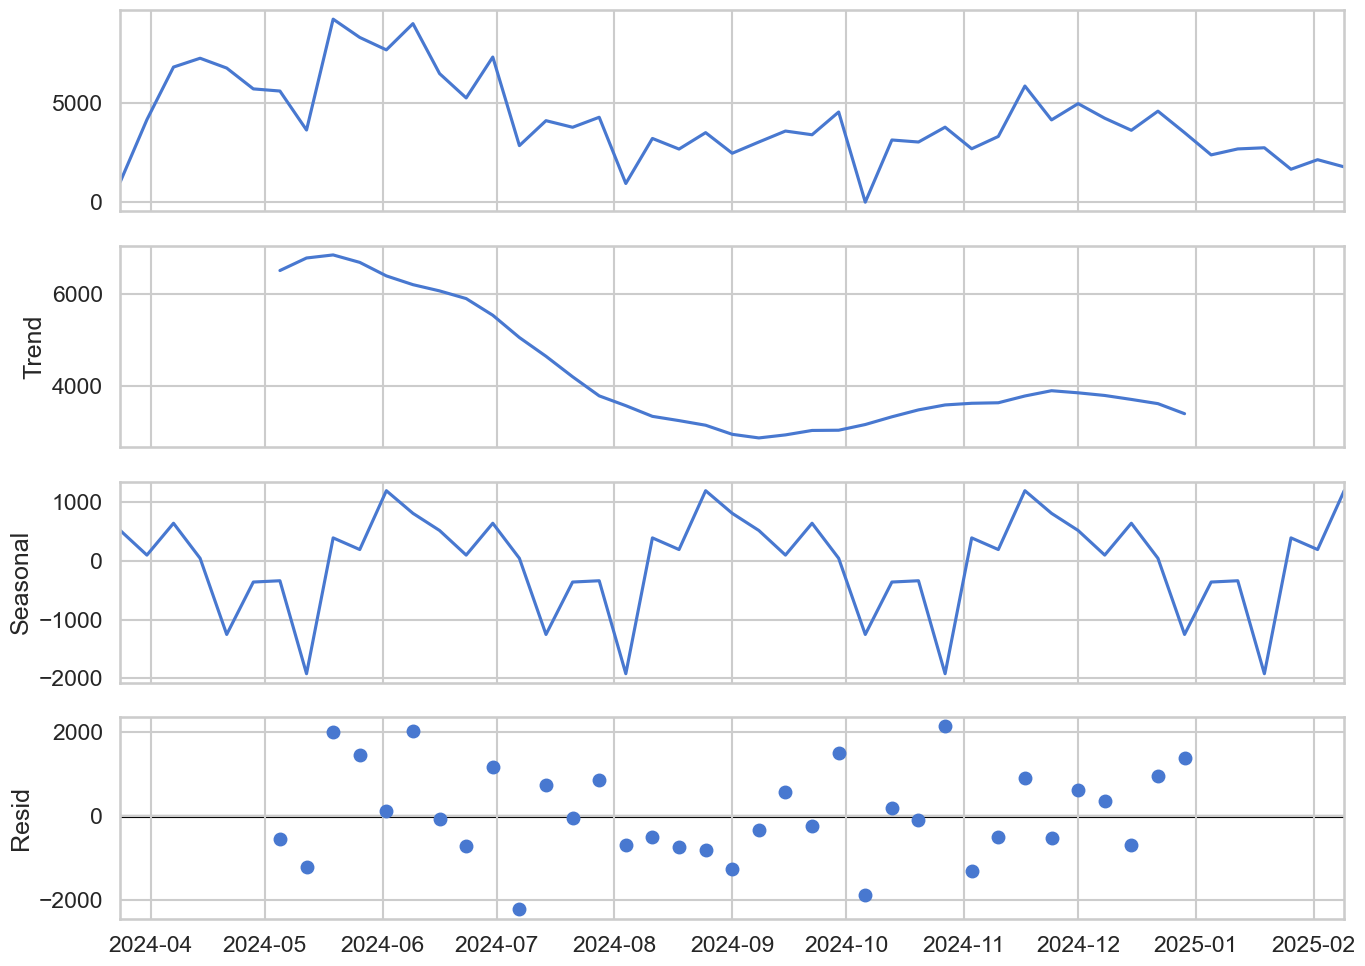

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Event Date is datetime and filter for operator 'NR'
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
nr_df = filtered_df[filtered_df['Operator'] == 'DK']

# Set Event Date as index and count alarms per week
nr_df = nr_df.set_index('Event Date')
weekly_series = nr_df.resample('W').size()

# Decompose the time series to view trend, seasonality, and residuals.
decomposition = seasonal_decompose(weekly_series, model='additive', period=12)  # use period=12 for quarterly seasonality

# Plot the decomposition
plt.rcParams.update({'figure.figsize': (14, 10)})
decomposition.plot()
plt.tight_layout()
plt.show()

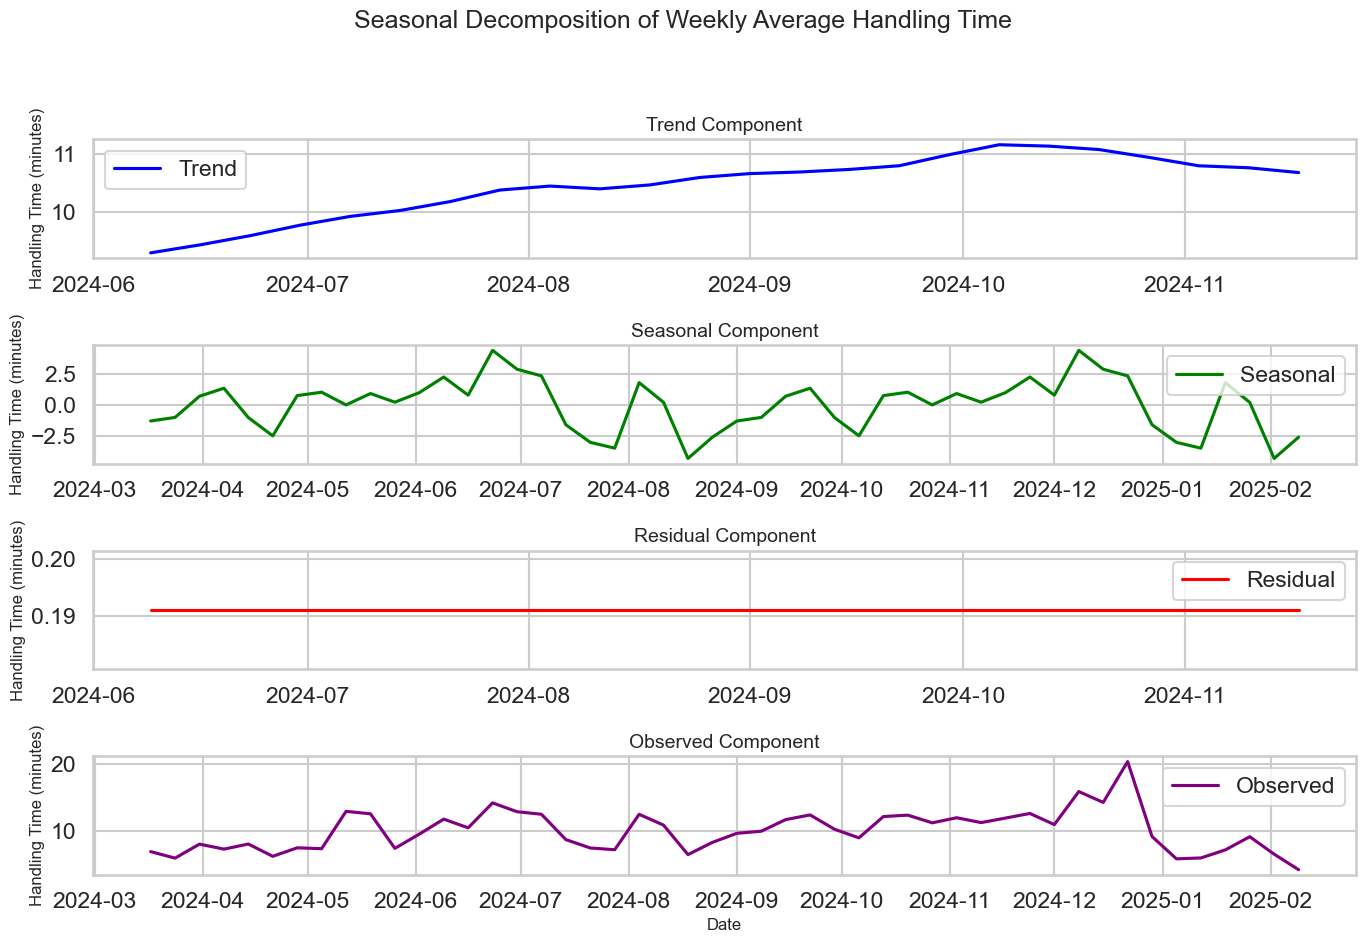

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Event Date' to datetime and set as index
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
df_copy = filtered_df.copy()

# Convert 'Handling Time' to minutes (or any appropriate unit)
df_copy['Handling Time (minutes)'] = pd.to_timedelta(df_copy['Handling Time'], errors='coerce').dt.total_seconds() / 60

# Set the Event Date as the index for time series analysis
df_copy = df_copy.set_index('Event Date')

# Resample to weekly frequency and calculate the average handling time per week
weekly_avg_handling = df_copy.resample('W')['Handling Time (minutes)'].mean()

# Remove missing values for reliable decomposition
weekly_avg_handling = weekly_avg_handling.dropna()

# Decompose the weekly time series to observe trend, seasonality, and residuals.
# Adjust the period as needed; here we use period=24 to capture bi-annual seasonality.
decomposition = seasonal_decompose(weekly_avg_handling, model='additive', period=24)

# Plotting the decomposition with enhanced aesthetics
plt.figure(figsize=(14, 10))

# Trend
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component', fontsize=14)
plt.ylabel('Handling Time (minutes)', fontsize=12)
plt.legend()

# Seasonal
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component', fontsize=14)
plt.ylabel('Handling Time (minutes)', fontsize=12)
plt.legend()

# Residual
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component', fontsize=14)
plt.ylabel('Handling Time (minutes)', fontsize=12)
plt.legend()

# Observed
plt.subplot(4, 1, 4)
plt.plot(decomposition.observed, label='Observed', color='purple')
plt.title('Observed Component', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Handling Time (minutes)', fontsize=12)
plt.legend()

plt.suptitle("Seasonal Decomposition of Weekly Average Handling Time", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

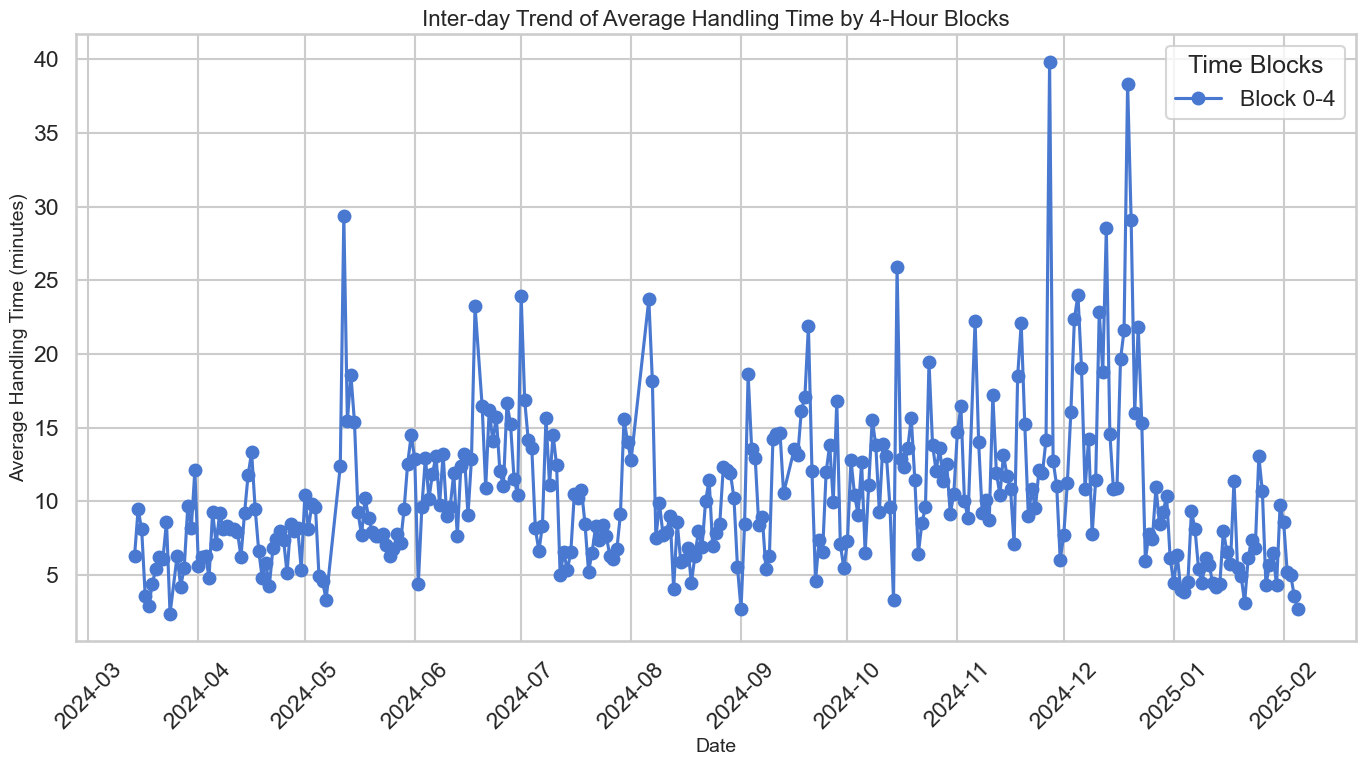

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Event Date' is in datetime format and convert 'Handling Time' to minutes
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['Handling Time (minutes)'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce').dt.total_seconds() / 60

# Create a new column for the hour and assign each record to a 4-hour block
filtered_df['Hour'] = filtered_df['Event Date'].dt.hour
def assign_time_block(hour):
    if 0 <= hour < 4:
        return "0-4"
    elif 4 <= hour < 8:
        return "4-8"
    elif 8 <= hour < 12:
        return "8-12"
    elif 12 <= hour < 16:
        return "12-16"
    elif 16 <= hour < 20:
        return "16-20"
    else:
        return "20-24"

filtered_df['TimeBlock'] = filtered_df['Hour'].apply(assign_time_block)

# Extract the date portion for daily aggregation
filtered_df['DateOnly'] = filtered_df['Event Date'].dt.date

# Group by Date and TimeBlock to compute the average handling time per block per day
daily_block_avg = filtered_df.groupby(['DateOnly', 'TimeBlock'])['Handling Time (minutes)'].mean().reset_index()

# Convert the date column back to datetime for time series analysis
daily_block_avg['DateOnly'] = pd.to_datetime(daily_block_avg['DateOnly'])

# Pivot the data so that each 4-hour block becomes a separate time series column
pivot_timeblocks = daily_block_avg.pivot(index='DateOnly', columns='TimeBlock', values='Handling Time (minutes)')

# Plot the inter-day trend for every 4-hour block
plt.figure(figsize=(14, 8))
for block in pivot_timeblocks.columns:
    plt.plot(pivot_timeblocks.index, pivot_timeblocks[block], marker='o', label=f"Block {block}")
plt.title("Inter-day Trend of Average Handling Time by 4-Hour Blocks", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Handling Time (minutes)", fontsize=14)
plt.legend(title="Time Blocks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (Optional) Perform seasonal decomposition for one block (e.g., the 8-12 block)
# Adjust the period as needed; here we use period=7 for weekly seasonality
if "8-12" in pivot_timeblocks.columns:
    block_series = pivot_timeblocks["8-12"].dropna()
    decomposition = seasonal_decompose(block_series, model='additive', period=7)
    plt.figure(figsize=(14, 10))
    decomposition.plot()
    plt.suptitle("Seasonal Decomposition of Average Handling Time (8-12 Block)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

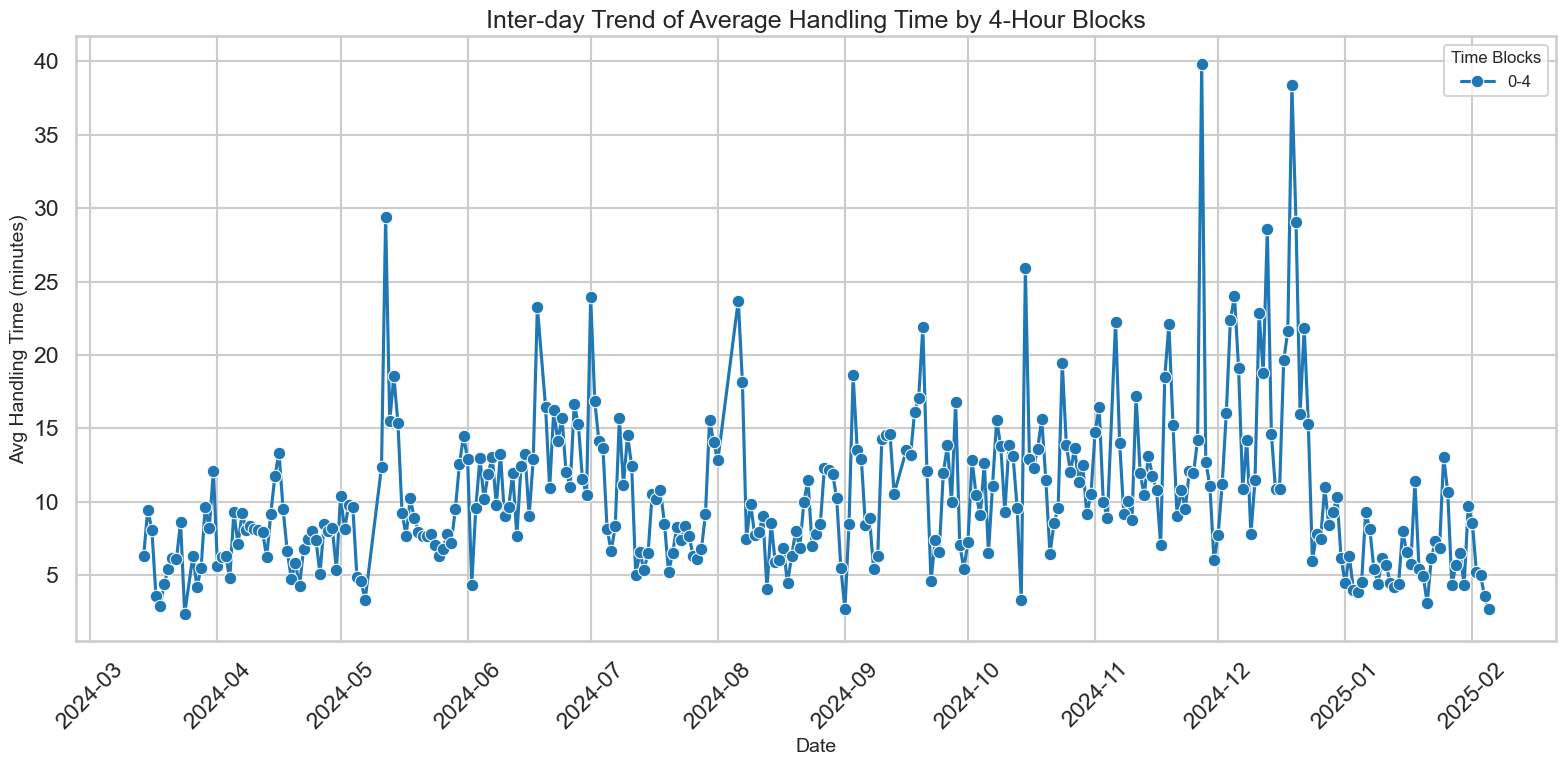

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pivot_timeblocks has been created as shown previously
# Reset index to convert DateOnly into a column for seaborn's lineplot
timeblocks_long = pivot_timeblocks.reset_index().melt(id_vars='DateOnly', var_name='TimeBlock', value_name='Avg Handling Time (minutes)')

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=timeblocks_long,
    x='DateOnly',
    y='Avg Handling Time (minutes)',
    hue='TimeBlock',
    marker='o',
    palette='tab10'
)
plt.title("Inter-day Trend of Average Handling Time by 4-Hour Blocks", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Avg Handling Time (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Time Blocks", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

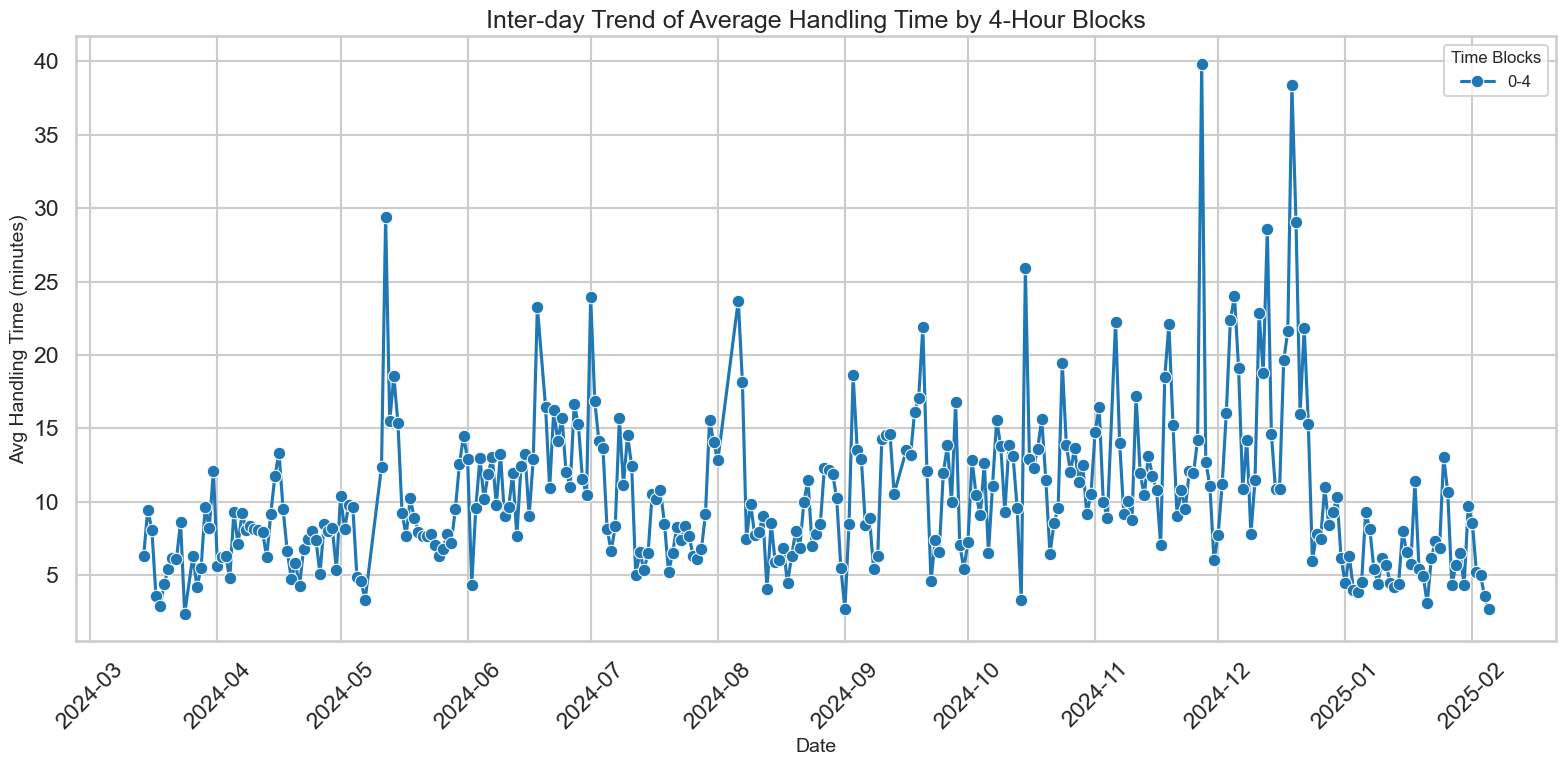

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivoted data from previous steps: 'pivot_timeblocks' should contain columns for all 4-hour blocks.
# Reset index and melt to long format so that each row corresponds to one DateOnly and one TimeBlock.
timeblocks_long = pivot_timeblocks.reset_index().melt(
    id_vars='DateOnly', 
    var_name='TimeBlock', 
    value_name='Avg Handling Time (minutes)'
)

# Plot all the blocks on the same graph using seaborn lineplot.
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=timeblocks_long,
    x='DateOnly',
    y='Avg Handling Time (minutes)',
    hue='TimeBlock',
    marker='o',
    palette='tab10'
)
plt.title("Inter-day Trend of Average Handling Time by 4-Hour Blocks", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Avg Handling Time (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Time Blocks", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\1079176199.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['DateOnly', 'TimeBlock'])['Handling Time (minutes)']


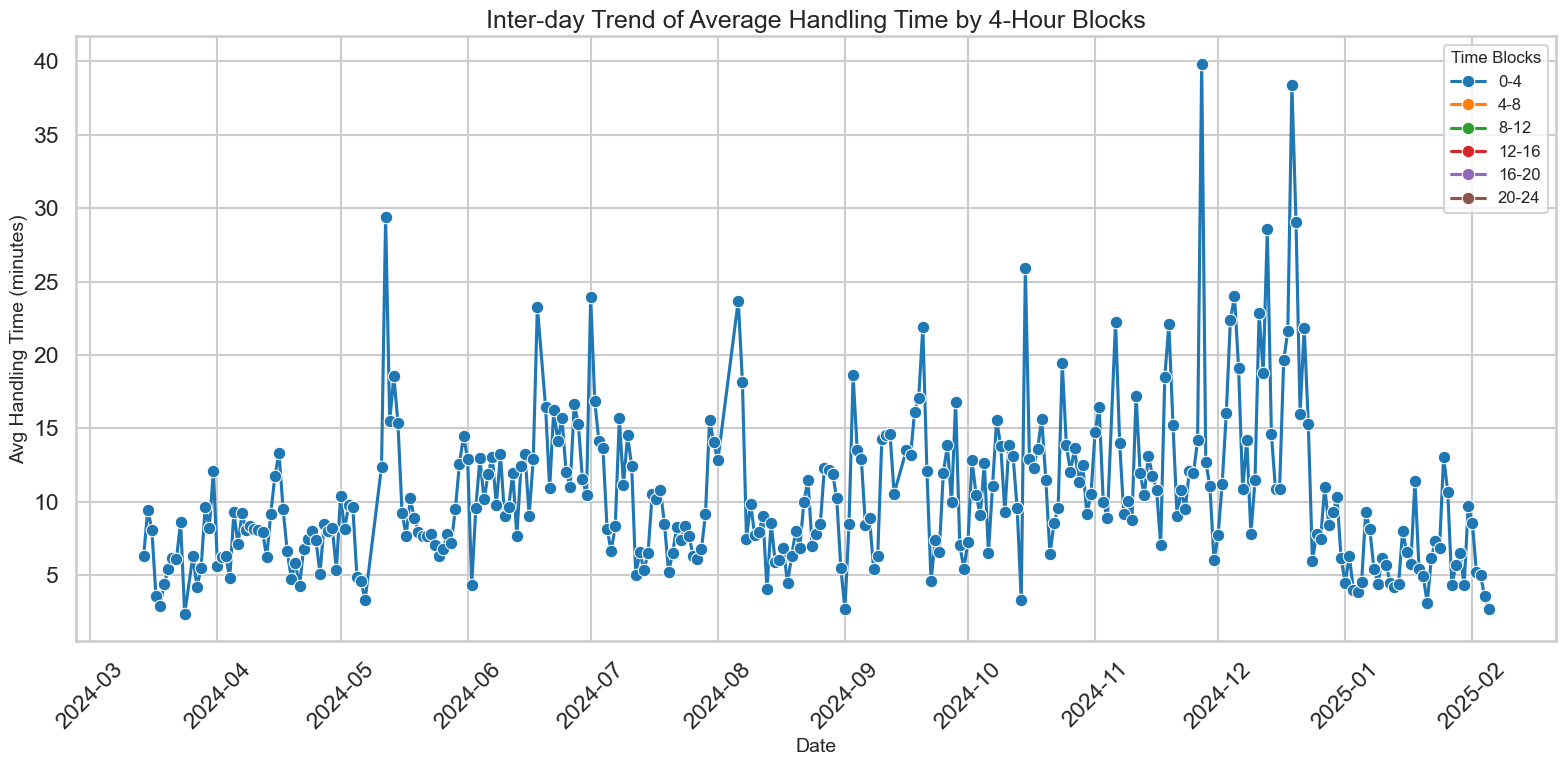

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 4-hour block categories in order
timeblocks_categories = ["0-4", "4-8", "8-12", "12-16", "16-20", "20-24"]

# Ensure 'Event Date' is in datetime format and 'Handling Time' is in minutes
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['Handling Time (minutes)'] = pd.to_timedelta(
    filtered_df['Handling Time'], errors='coerce'
).dt.total_seconds() / 60

# Create a TimeBlock column by extracting the hour and assigning the block,
# and make sure it is a categorical with the defined order
def assign_time_block(hour):
    if 0 <= hour < 4:
        return "0-4"
    elif 4 <= hour < 8:
        return "4-8"
    elif 8 <= hour < 12:
        return "8-12"
    elif 12 <= hour < 16:
        return "12-16"
    elif 16 <= hour < 20:
        return "16-20"
    else:
        return "20-24"

filtered_df['Hour'] = filtered_df['Event Date'].dt.hour
filtered_df['TimeBlock'] = filtered_df['Hour'].apply(assign_time_block)
filtered_df['TimeBlock'] = pd.Categorical(
    filtered_df['TimeBlock'], categories=timeblocks_categories, ordered=True
)

# Extract the date portion for daily aggregation
filtered_df['DateOnly'] = filtered_df['Event Date'].dt.date

# Group by DateOnly and TimeBlock to compute the average handling time per block per day
daily_block_avg = (
    filtered_df.groupby(['DateOnly', 'TimeBlock'])['Handling Time (minutes)']
    .mean()
    .reset_index()
)

# Convert 'DateOnly' back to datetime for time series plotting
daily_block_avg['DateOnly'] = pd.to_datetime(daily_block_avg['DateOnly'])

# Pivot the data so that each 4-hour block becomes its own column (even if some days lack data)
pivot_timeblocks = daily_block_avg.pivot(index='DateOnly', columns='TimeBlock', values='Handling Time (minutes)')

# Melt the pivot table into a long format: this should now contain 6 distinct TimeBlock entries per day (if available)
timeblocks_long = pivot_timeblocks.reset_index().melt(
    id_vars='DateOnly', var_name='TimeBlock', value_name='Avg Handling Time (minutes)'
)

# Plot the inter-day trend with one line per 4-hour block
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=timeblocks_long,
    x='DateOnly',
    y='Avg Handling Time (minutes)',
    hue='TimeBlock',
    marker='o',
    palette='tab10'
)
plt.title("Inter-day Trend of Average Handling Time by 4-Hour Blocks", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Avg Handling Time (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Time Blocks", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

In [102]:
print(filtered_df['DateOnly'].unique())

[datetime.date(2024, 3, 14) datetime.date(2024, 3, 15)
 datetime.date(2024, 3, 16) datetime.date(2024, 3, 17)
 datetime.date(2024, 3, 18) datetime.date(2024, 3, 19)
 datetime.date(2024, 3, 20) datetime.date(2024, 3, 21)
 datetime.date(2024, 3, 22) datetime.date(2024, 3, 23)
 datetime.date(2024, 3, 24) datetime.date(2024, 3, 26)
 datetime.date(2024, 3, 27) datetime.date(2024, 3, 28)
 datetime.date(2024, 3, 29) datetime.date(2024, 3, 30)
 datetime.date(2024, 3, 31) datetime.date(2024, 4, 1)
 datetime.date(2024, 4, 2) datetime.date(2024, 4, 3)
 datetime.date(2024, 4, 4) datetime.date(2024, 4, 5)
 datetime.date(2024, 4, 6) datetime.date(2024, 4, 7)
 datetime.date(2024, 4, 8) datetime.date(2024, 4, 9)
 datetime.date(2024, 4, 10) datetime.date(2024, 4, 11)
 datetime.date(2024, 4, 12) datetime.date(2024, 4, 13)
 datetime.date(2024, 4, 14) datetime.date(2024, 4, 15)
 datetime.date(2024, 4, 16) datetime.date(2024, 4, 17)
 datetime.date(2024, 4, 18) datetime.date(2024, 4, 19)
 datetime.date(2024

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_22644\971348018.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_block_avg = filtered_df.groupby(['DateOnly', 'TimeBlock'])['Handling Time (minutes)'] \


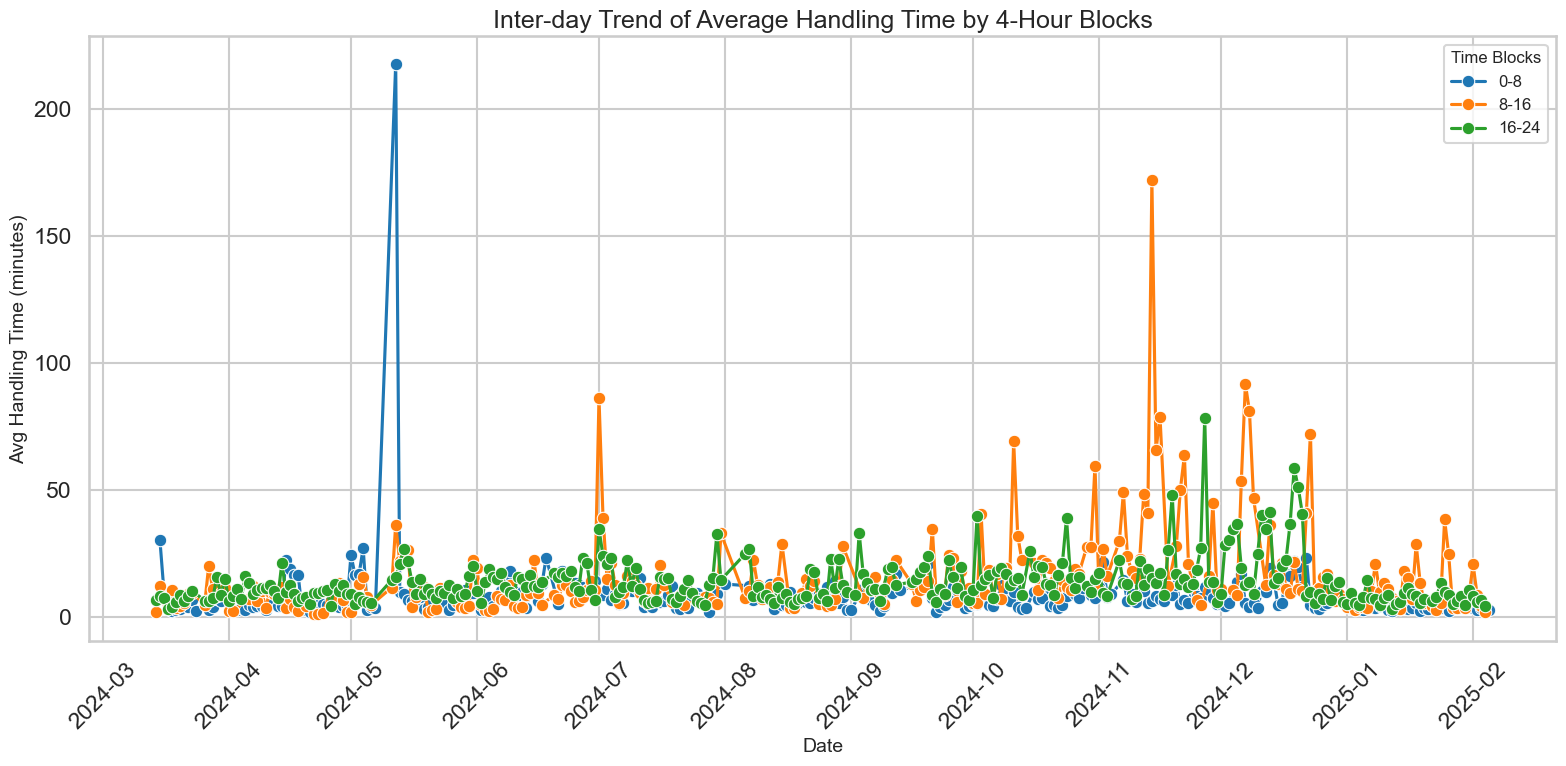

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare the data using Event Time rather than Event Date ---

# Combine the date information (from 'Event Date') with the time information (from 'Event Time')
# into a complete datetime value. Adjust the format if needed.
filtered_df['EventDatetime'] = pd.to_datetime(
    filtered_df['Event Date'].astype(str) + ' ' + filtered_df['Event Time'].astype(str),
    errors='coerce'
)

# Extract the hour from the combined datetime.
filtered_df['Hour'] = filtered_df['EventDatetime'].dt.hour

# Function to assign a 4-hour block given the hour.
def assign_time_block(hour):
    if 0 <= hour < 8:
        return "0-8"
    elif 8 <= hour < 16:
        return "8-16"
    else: 
        return "16-24"

filtered_df['TimeBlock'] = filtered_df['Hour'].apply(assign_time_block)
# Order the time blocks for plotting
timeblocks_order = ["0-8", "8-16", "16-24"]
filtered_df['TimeBlock'] = pd.Categorical(filtered_df['TimeBlock'], categories=timeblocks_order, ordered=True)

# Use the combined datetime to extract the date (day) for inter-day analysis
filtered_df['DateOnly'] = filtered_df['EventDatetime'].dt.date

# Convert 'Handling Time' to minutes
filtered_df['Handling Time (minutes)'] = pd.to_timedelta(filtered_df['Handling Time'], errors='coerce').dt.total_seconds() / 60

# --- Aggregate the data into 4-hour blocks per day ---
daily_block_avg = filtered_df.groupby(['DateOnly', 'TimeBlock'])['Handling Time (minutes)'] \
    .mean() \
    .reset_index()

# Convert the date back to a datetime for plotting
daily_block_avg['DateOnly'] = pd.to_datetime(daily_block_avg['DateOnly'])

# Pivot the data so that each TimeBlock becomes its own column (one row per day)
pivot_timeblocks = daily_block_avg.pivot(index='DateOnly', columns='TimeBlock', values='Handling Time (minutes)')

# Melt the pivot table into a long format for use with seaborn
timeblocks_long = pivot_timeblocks.reset_index().melt(
    id_vars='DateOnly', 
    var_name='TimeBlock', 
    value_name='Avg Handling Time (minutes)'
)

# --- Plot the inter-day trend for all 6 different 4-hour blocks on the same graph ---
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=timeblocks_long,
    x='DateOnly',
    y='Avg Handling Time (minutes)',
    hue='TimeBlock',
    marker='o',
    palette='tab10'
)
plt.title("Inter-day Trend of Average Handling Time by 4-Hour Blocks", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Avg Handling Time (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Time Blocks", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()